# Build Model

In [6]:
import pandas as pd

def get_dataframe(file_path):
    try:
        # Read the CSV file
        data = pd.read_csv(file_path)
        # Drop unnecessary column if exists
        if 'Unnamed: 0' in data.columns:
            data.drop(columns=['Unnamed: 0'], inplace=True)
        # Sort by 'year' in ascending order
        if 'year' in data.columns:
            data = data.sort_values(by='year', ascending=True)
        # Define columns of interest (ensure proper case matching)
        columns_of_interest = [
            'year', 'earningPerShare', 'bookValuePerShare', 'equityOnTotalAsset',
            'grossProfitMargin', 'debtOnEquity', 'postTaxMargin', 'currentPayment',
            'quickPayment', 'cashOnEquity', 'cashCirculation', 'revenueOnAsset',
            'debtOnAsset', 'postTaxOnPreTax', 'capitalBalance', 'epsChange', 'roe',
            'roa'
        ]
        # Check if all required columns are present in the data
        missing_columns = [col for col in columns_of_interest if col not in data.columns]
        if missing_columns:
            print(f"Warning: Missing columns: {missing_columns}")
            return None
        # Select the required columns
        selected_data = data[columns_of_interest]
        # Reset index after selection
        selected_data = selected_data.reset_index(drop=True)
        # Drop columns with more than 3 missing values
        selected_data = selected_data.loc[:, selected_data.isnull().sum() <= 3]
        # Drop rows with any missing values
        selected_data.dropna(inplace=True)
        # Return the cleaned data
        return selected_data
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


In [5]:
data_vn = get_dataframe("BBC-VNINDEX-Finance.csv")
data_vn

,year,earningPerShare,bookValuePerShare,equityOnTotalAsset,grossProfitMargin,debtOnEquity,postTaxMargin,currentPayment,quickPayment,cashOnEquity,cashCirculation,revenueOnAsset,debtOnAsset,postTaxOnPreTax,capitalBalance,epsChange,roe,roa
0,2004,870,5243,0.570,0.255,0.5,0.029,1.2,0.4,0.060,70,1.6,0.3,1.3,14,0.047,0.174,0.090
1,2004,956,5399,0.557,0.270,0.4,0.041,1.3,0.4,0.071,69,1.7,0.2,1.3,16,0.100,0.189,0.098
2,2004,595,5233,0.505,0.276,0.4,0.058,1.2,0.4,0.093,89,1.5,0.2,1.3,15,-0.378,0.112,0.057
3,2005,796,6275,0.544,0.239,0.3,0.050,1.3,0.5,0.115,68,1.7,0.1,1.3,24,0.033,0.138,0.073
4,2005,689,5391,0.560,0.262,0.4,0.036,1.3,0.4,0.058,80,1.7,0.2,1.3,19,0.159,0.131,0.071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2021,5327,58828,0.753,0.302,0.1,0.022,1.9,1.7,0.142,83,1.0,0.1,0.8,313,0.068,0.095,0.072
70,2021,1094,56381,0.619,0.312,0.0,0.040,1.1,0.8,0.168,86,0.7,0.0,0.8,36,-0.454,0.019,0.013
71,2022,7704,71537,0.749,0.255,0.0,0.436,1.8,1.6,0.155,110,0.7,0.0,0.8,364,6.040,0.118,0.089
73,2022,9024,70108,0.690,0.325,0.2,0.055,1.3,1.0,0.043,69,0.9,0.2,0.8,166,0.177,0.144,0.104


In [6]:
data_vn.isna().sum()

,0
year,0
earningPerShare,0
bookValuePerShare,0
equityOnTotalAsset,0
grossProfitMargin,0
debtOnEquity,0
postTaxMargin,0
currentPayment,0
quickPayment,0
cashOnEquity,0


In [7]:
import preprocess as pp
data_slice=slice(1, None)
num_features = pp.get_num_features(data_slice, data_vn)
num_features

17

In [8]:
window_size=1
samples = pp.get_data_samples_kth_day(data_vn, 1, data_slice, label_colID = -2, window_size=window_size)
X_data = samples[0]
y_data= samples[1]

In [9]:
X_data[0]

array([[8.700e+02, 5.243e+03, 5.700e-01, 2.550e-01, 5.000e-01, 2.900e-02,
        1.200e+00, 4.000e-01, 6.000e-02, 7.000e+01, 1.600e+00, 3.000e-01,
        1.300e+00, 1.400e+01, 4.700e-02, 1.740e-01, 9.000e-02]])

In [10]:
y_data[0]

array([0.189])

## Models

### lstm

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Bidirectional, Dropout, BatchNormalization

def create_lstm(input_shape):

    # Define the model with increased complexity
    model_lstm = Sequential([
        # First LSTM layer with more units
        LSTM(8, input_shape=input_shape, return_sequences=True),
        LSTM(16),
        # Dense layer with more units and ReLU activation
        Dense(10, activation='relu'),
        Dense(1)
    ])
    return model_lstm

###gru

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense,Bidirectional, Dropout, BatchNormalization

def create_gru(input_shape):

    # Define the model with increased complexity
    model_gru = Sequential([
        # First LSTM layer with more units
        GRU(8, input_shape=input_shape, return_sequences=True),
        GRU(16),
        # Dense layer with more units and ReLU activation
        Dense(10, activation='relu'),
        Dense(1)
    ])
    return model_gru

### bilstm

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Bidirectional, Dropout, BatchNormalization

def create_bilstm(input_shape):

    # Define the model with increased complexity
    model_bilstm = Sequential([
        # First LSTM layer with more units
        LSTM(16, input_shape=input_shape, return_sequences=True),
        Bidirectional(LSTM(8, return_sequences=False)),
        # Dense layer with more units and ReLU activation
        Dense(10, activation='relu'),
        # Final Dense layer for output (3 classes)
        Dense(1)  # Output layer with 3 units for classification
    ])

    return model_bilstm

### bigru

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense,Bidirectional, Dropout, BatchNormalization

def create_bigru(input_shape):

    # Define the model with increased complexity
    model_bigru = Sequential([
        # First LSTM layer with more units
        GRU(16, input_shape=input_shape, return_sequences=True),
        Bidirectional(GRU(8)),
        Dense(10, activation='relu'),
        # Final Dense layer for output (3 classes)
        Dense(1)  # Output layer with 3 units for classification
    ])

    return model_bigru

## Def

In [15]:
from tensorflow.keras.optimizers import Adam, SGD, Nadam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

import tensorflow as tf
# Adjust the optimizer and learning rate
#optimizer = Adam(learning_rate=0.001)
def compile(model, optimizer):
  model.compile(
      loss='mean_squared_error',
      optimizer=optimizer,
      metrics=['mae']
  )
def get_callbacks(file_path):
  # Training callbacks
  callbacks = [
      EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
      ModelCheckpoint(filepath=file_path, monitor='val_loss', save_best_only=True),
      ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
  ]
  return callbacks

def train_history(model, batch_size, epochs, callbacks, X_train_norm, y_train_norm, validation_data):
  # Fit the model with data augmentation
  model_training_history = model.fit(
      X_train_norm, y_train_norm,
      batch_size=batch_size,
      epochs=epochs,
      validation_data=(X_val_norm, y_val_norm),
      callbacks=callbacks
  )
  return model_training_history

In [16]:
def plot_performance(history):
    # Create a figure with 1 row and 2 columns for side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot loss
    axes[0].plot(history.history['loss'])
    axes[0].plot(history.history['val_loss'])
    axes[0].set_title('Model Loss')
    axes[0].set_ylabel('Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].legend(['Train', 'Val'], loc='upper right')

    # Plot mae
    axes[1].plot(history.history['mae'])
    axes[1].plot(history.history['val_mae'])
    axes[1].set_title('Model mae')
    axes[1].set_ylabel('mae')
    axes[1].set_xlabel('Epoch')
    axes[1].legend(['Train', 'Val'], loc='upper left')

    # Display the plots
    plt.tight_layout()
    plt.show()


In [17]:
# Evaluate
from sklearn.metrics import mean_squared_error

def get_model_n_evaluate(model_path, X_test_norm, y_test_norm):
  model = tf.keras.models.load_model(model_path)
  result = model.evaluate(X_test_norm, y_test_norm)
  print(model.metrics_names) # result_1d[0] is loss, result_1d[1] is mse. The metrics are defined in model_1d.complie(...)
  print("Loss and mae on the test set: loss = {}, mae = {}".format(result[0],result[1]))
  return model

def get_reverse_prediction(loaded_model, X_test_norm, y_scaler):
  # Get prediction on the test data
  y_pred_norm = loaded_model.predict(X_test_norm)
  print("MSE on the test set: ", mean_squared_error(y_pred_norm, y_test_norm))

  # Now, to denormalize the norm data back to the original scale:
  y_pred_denorm = y_scaler.inverse_transform(y_pred_norm)

  # Check the shapes
  print("Shape of denormalized training set: ", y_pred_denorm.shape)
  return y_pred_denorm


In [18]:
# Visualize preditec stock ROE versus real stock ROE
def plot_prediction(y_pred_denorm, y_test, title):
  plt.figure(figsize=(16, 8), dpi=300)
  plt.plot(y_pred_denorm, label='Predicted ROE')
  plt.plot(y_test, label='Real ROE')
  plt.title('ROE trend prediction', fontsize=16)
  plt.xlabel('Time (days)', fontsize=14)
  plt.ylabel('ROE value', fontsize=14)
  plt.grid() # Add grid
  plt.legend() # Add legend
  plt.show()

In [19]:
import numpy as np
def plot_prediction_timestep(y_pred_denorm, y_test, title, time_steps=np.arange(0, 1)):
  plt.figure(figsize=(16, 8), dpi=300)
  # Plot for the first sample only
  plt.plot(time_steps, y_pred_denorm[5], label='Predicted ROE', linestyle='--', marker='o')
  plt.plot(time_steps, y_test[5], label='Real ROE', linestyle='-', marker='x')

  # Add titles, labels, and legend
  plt.title('Predicted vs Real ROE Over the Next 5th Day for Sample 10', fontsize=16)
  plt.xlabel('Days', fontsize=14)
  plt.ylabel('ROE value', fontsize=14)
  plt.xticks(time_steps)  # Set x-ticks to represent days
  plt.grid()  # Add grid
  plt.legend()  # Add legend
  plt.show()


## Normal train

### split & normalise

In [20]:
splited_sets = pp.split_data(X_data, y_data, test_size=0.1, val_size=0.1)
X_train = splited_sets[0]
X_val = splited_sets[1]
X_test = splited_sets[2]

y_train = splited_sets[3]
y_val = splited_sets[4]
y_test = splited_sets[5]

In [21]:
# Reshape the numpy array to fit the neural network input shape requirement
X_train = X_train.reshape(X_train.shape[0], window_size, num_features)
X_val = X_val.reshape(X_val.shape[0], window_size, num_features)
X_test = X_test.reshape(X_test.shape[0], window_size, num_features)

# Print shape of the training, validation and test set
print("Shape of training set: ", X_train.shape)
print("Shape of validation set: ", X_val.shape)
print("Shape of test set: ", X_test.shape)
print()
print("Shape of training set: ", y_train.shape)
print("Shape of validation set: ", y_val.shape)
print("Shape of test set: ", y_test.shape)

Shape of training set:  (56, 1, 17)
Shape of validation set:  (7, 1, 17)
Shape of test set:  (7, 1, 17)

Shape of training set:  (56, 1)
Shape of validation set:  (7, 1)
Shape of test set:  (7, 1)


In [22]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# Initialize the MinMaxScaler for each feature
y_scaler = MinMaxScaler()
# Reshape each feature (axis=-1) for scaling
X_train_norm = X_train.copy()
X_val_norm = X_val.copy()
X_test_norm = X_test.copy()
feature_scalers = []

# Loop through each feature (axis=2) and scale across time and samples
for i in range(X_train.shape[2]):
    # Flatten the data for the i-th feature and apply MinMaxScaler
    scaler = MinMaxScaler()
    X_train_norm[:, :, i] = scaler.fit_transform(X_train[:, :, i])
    X_val_norm[:, :, i] = scaler.transform(X_val[:, :, i])
    X_test_norm[:, :, i] = scaler.transform(X_test[:, :, i])
    feature_scalers.append(scaler)

    y_train_norm = y_scaler.fit_transform(y_train)
    y_val_norm = y_scaler.transform(y_val)
    y_test_norm = y_scaler.transform(y_test)

# Saving the feature scaler (scaler for input features)
joblib.dump(feature_scalers, 'task4_feature_scalers.pkl')

# Savin the label scaler (scaler for output labels)
joblib.dump(y_scaler, 'task4_y_scaler.pkl')

# Check the new shapes (they should remain the same as before)
print("Shape of scaled training set: ", X_train_norm.shape)
print("Shape of scaled validation set: ", X_val_norm.shape)
print("Shape of scaled test set: ", X_test_norm.shape)
print()
print("Shape of scales training label ", y_train_norm.shape)
print("Shape of scales validation label ", y_val_norm.shape)
print("Shape of scales test label ", y_test_norm.shape)

Shape of scaled training set:  (56, 1, 17)
Shape of scaled validation set:  (7, 1, 17)
Shape of scaled test set:  (7, 1, 17)

Shape of scales training label  (56, 1)
Shape of scales validation label  (7, 1)
Shape of scales test label  (7, 1)


In [23]:
y_test_norm

array([[ 0.39759036],
       [ 0.38554217],
       [ 0.59638554],
       [ 0.43373494],
       [-0.02409639],
       [ 0.57228916],
       [ 0.72891566]])

### train

In [24]:
# Compile and train GRU
optimizer = SGD(learning_rate=0.1)
model_gru = create_gru((window_size, num_features))
compile(model_gru, optimizer)
callbacks = get_callbacks(file_path='model_gru.keras')
history_gru = train_history(model_gru, batch_size=32, epochs=40, callbacks=callbacks,
                               X_train_norm=X_train_norm, y_train_norm=y_train_norm,
                               validation_data=(X_val_norm, y_val_norm))

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 511ms/step - loss: 0.1559 - mae: 0.3334 - val_loss: 0.0120 - val_mae: 0.0989 - learning_rate: 0.1000
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0412 - mae: 0.1603 - val_loss: 0.0077 - val_mae: 0.0795 - learning_rate: 0.1000
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0409 - mae: 0.1567 - val_loss: 0.0091 - val_mae: 0.0863 - learning_rate: 0.1000
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0455 - mae: 0.1694 - val_loss: 0.0060 - val_mae: 0.0734 - learning_rate: 0.1000
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0433 - mae: 0.1586 - val_loss: 0.0126 - val_mae: 0.1011 - learning_rate: 0.1000
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0433 - mae: 0.1639 - val_loss: 0.0044 - val_mae: 0.0637 - learning_rate: 0.1000
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0444 - mae: 0.1618 - val_loss: 0.0154 - val_mae: 0.1112 - learning_rate: 0.1000
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0

In [25]:
# Compile and train LSTM
optimizer = SGD(learning_rate=0.1)
model_lstm = create_lstm((window_size, num_features))
compile(model_lstm, optimizer)
callbacks = get_callbacks(file_path='model_lstm.keras')
history_lstm = train_history(model_lstm, batch_size=32, epochs=40, callbacks=callbacks,
                               X_train_norm=X_train_norm, y_train_norm=y_train_norm,
                               validation_data=(X_val_norm, y_val_norm))

Epoch 1/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 461ms/step - loss: 0.2323 - mae: 0.4319 - val_loss: 0.0886 - val_mae: 0.2933 - learning_rate: 0.1000
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0869 - mae: 0.2376 - val_loss: 0.0322 - val_mae: 0.1722 - learning_rate: 0.1000
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0568 - mae: 0.1919 - val_loss: 0.0181 - val_mae: 0.1247 - learning_rate: 0.1000
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0487 - mae: 0.1772 - val_loss: 0.0111 - val_mae: 0.0965 - learning_rate: 0.1000
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0476 - mae: 0.1765 - val_loss: 0.0097 - val_mae: 0.0905 - learning_rate: 0.1000
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0445 - mae: 0.1665 - val_loss: 0.0083 - val_mae: 0.0846 - learning_rate: 0.1000
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0434 - mae: 0.1622 - val_loss: 0.0083 - val_mae: 0.0844 - learning_rate: 0.1000
Epoch 8/40
2/2 ━━━━━━━━━━━

In [26]:
# Compile and train BiLSTM
optimizer = SGD(learning_rate=0.1)
model_bilstm = create_bilstm((window_size, num_features))
compile(model_bilstm, optimizer)
callbacks = get_callbacks(file_path='model_bilstm.keras')
history_bilstm = train_history(model_bilstm, batch_size=32, epochs=40, callbacks=callbacks,
                               X_train_norm=X_train_norm, y_train_norm=y_train_norm,
                               validation_data=(X_val_norm, y_val_norm))

Epoch 1/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 828ms/step - loss: 0.2753 - mae: 0.4702 - val_loss: 0.1305 - val_mae: 0.3581 - learning_rate: 0.1000
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.1125 - mae: 0.2744 - val_loss: 0.0511 - val_mae: 0.2209 - learning_rate: 0.1000
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0663 - mae: 0.2085 - val_loss: 0.0229 - val_mae: 0.1439 - learning_rate: 0.1000
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0542 - mae: 0.1891 - val_loss: 0.0143 - val_mae: 0.1100 - learning_rate: 0.1000
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0459 - mae: 0.1702 - val_loss: 0.0093 - val_mae: 0.0884 - learning_rate: 0.1000
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0474 - mae: 0.1749 - val_loss: 0.0088 - val_mae: 0.0865 - learning_rate: 0.1000
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0486 - mae: 0.1758 - val_loss: 0.0079 - val_mae: 0.0822 - learning_rate: 0.1000
Epoch 8/40
2/2 ━━━━━━━━━━━

In [27]:
# Compile and train BiLSTM
optimizer = SGD(learning_rate=0.1)
model_bigru = create_bigru((window_size, num_features))
compile(model_bigru, optimizer)
callbacks = get_callbacks(file_path='model_bigru.keras')
history_bigru = train_history(model_bigru, batch_size=32, epochs=40, callbacks=callbacks,
                               X_train_norm=X_train_norm, y_train_norm=y_train_norm,
                               validation_data=(X_val_norm, y_val_norm))

Epoch 1/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 995ms/step - loss: 0.3128 - mae: 0.5020 - val_loss: 0.1034 - val_mae: 0.3184 - learning_rate: 0.1000
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.1217 - mae: 0.2885 - val_loss: 0.0406 - val_mae: 0.1965 - learning_rate: 0.1000
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0740 - mae: 0.2152 - val_loss: 0.0159 - val_mae: 0.1182 - learning_rate: 0.1000
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0607 - mae: 0.1926 - val_loss: 0.0080 - val_mae: 0.0802 - learning_rate: 0.1000
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0556 - mae: 0.1810 - val_loss: 0.0065 - val_mae: 0.0731 - learning_rate: 0.1000
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0498 - mae: 0.1746 - val_loss: 0.0044 - val_mae: 0.0601 - learning_rate: 0.1000
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0508 - mae: 0.1756 - val_loss: 0.0039 - val_mae: 0.0566 - learning_rate: 0.1000
Epoch 8/40
2/2 ━━━━━━━━━━

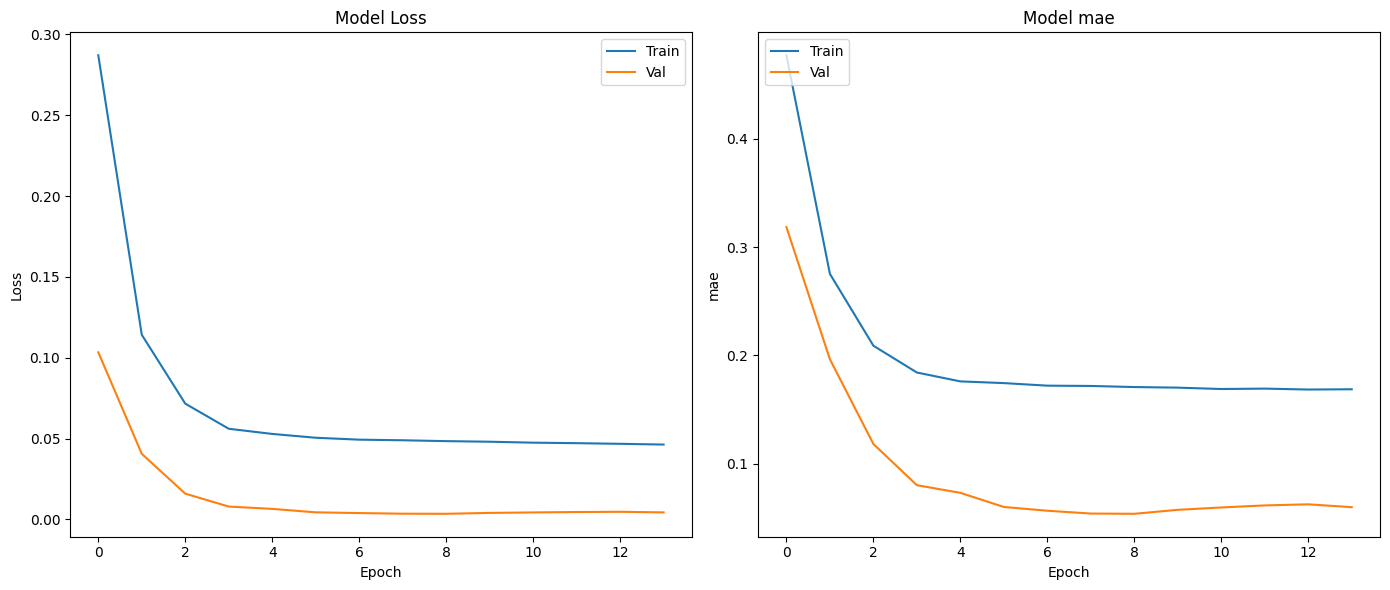

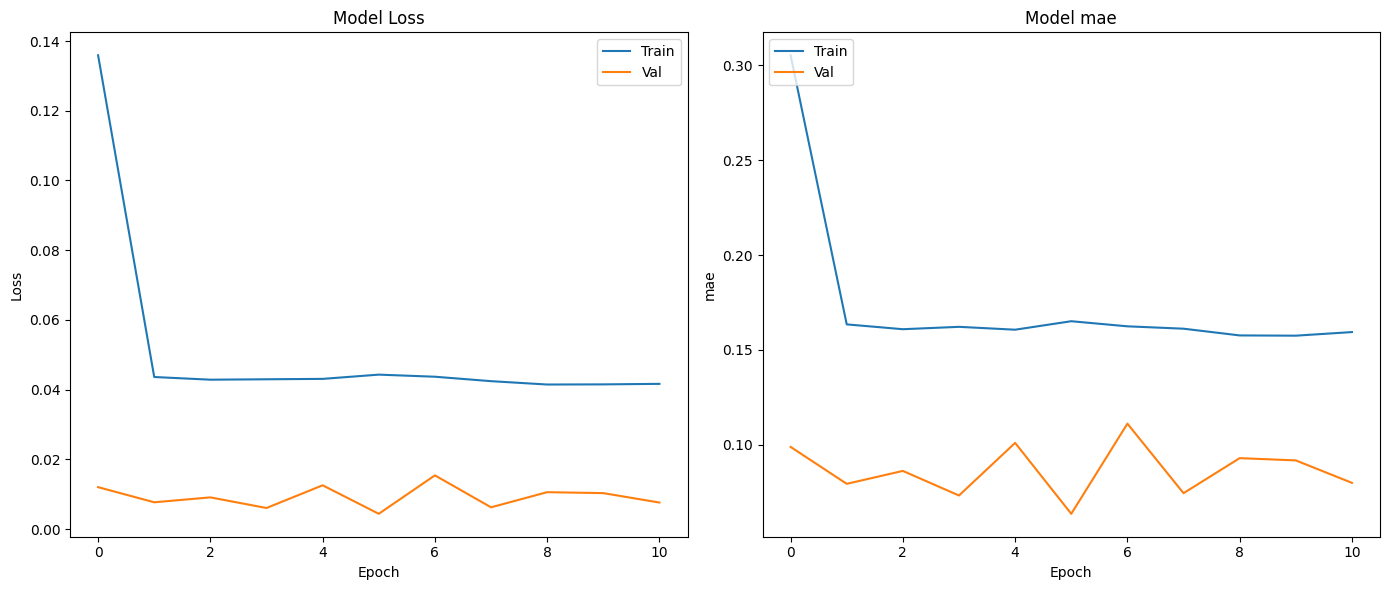

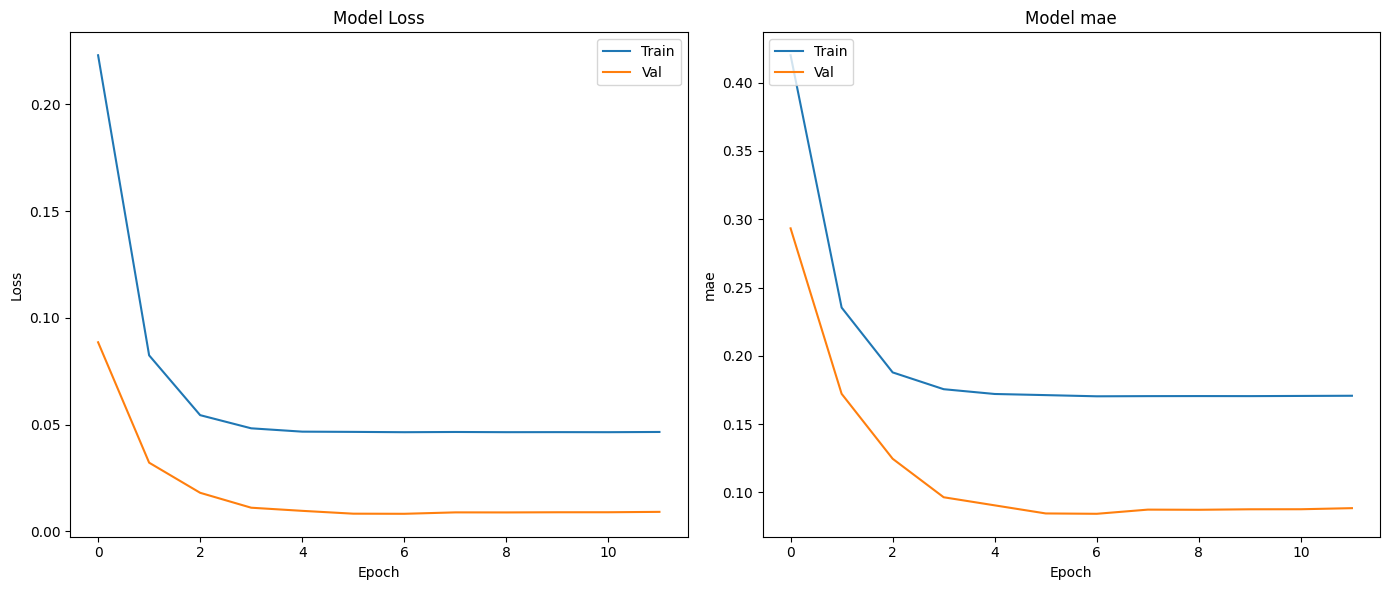

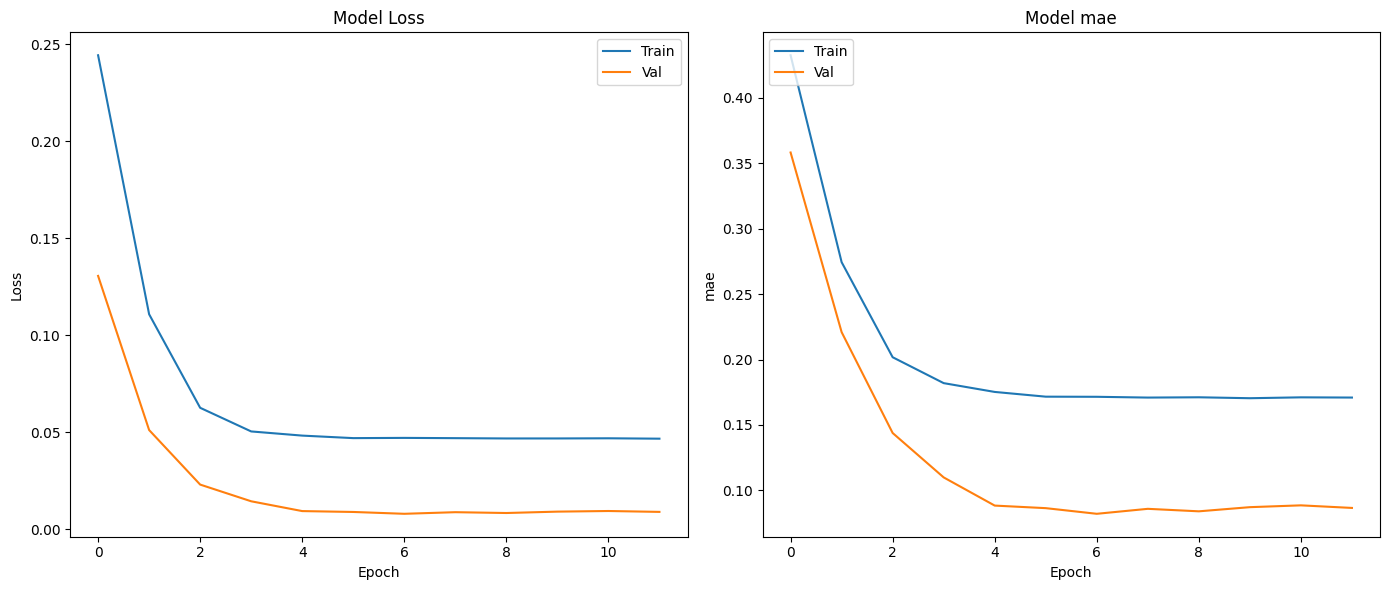

In [28]:
plot_performance(history_bigru)
plot_performance(history_gru)
plot_performance(history_lstm)
plot_performance(history_bilstm)

### evaluate

In [29]:
print("=========BiLSTM===========")
model_bilstm = get_model_n_evaluate("/content/model_bilstm.keras", X_test_norm, y_test_norm)
y_pred_denorm_bilstm = get_reverse_prediction(model_bilstm, X_test_norm, y_scaler)
print()

print("=========LSTM===========")
model_lstm = get_model_n_evaluate("/content/model_lstm.keras", X_test_norm, y_test_norm)
y_pred_denorm_lstm = get_reverse_prediction(model_lstm, X_test_norm, y_scaler)

print("=========BiGRU===========")
model_bigru = get_model_n_evaluate("/content/model_bigru.keras", X_test_norm, y_test_norm)
y_pred_denorm_bigru = get_reverse_prediction(model_bigru, X_test_norm, y_scaler)
print()

print("=========GRU===========")
model_gru = get_model_n_evaluate("/content/model_gru.keras", X_test_norm, y_test_norm)
y_pred_denorm_gru = get_reverse_prediction(model_gru, X_test_norm, y_scaler)
print()

=========BiLSTM===========
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 864ms/step - loss: 0.0504 - mae: 0.1687
['loss', 'compile_metrics']
Loss and mae on the test set: loss = 0.0504063181579113, mae = 0.16872572898864746
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
MSE on the test set:  0.05040631484190661
Shape of denormalized training set:  (7, 1)

=========LSTM===========
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step - loss: 0.0523 - mae: 0.1726
['loss', 'compile_metrics']
Loss and mae on the test set: loss = 0.052250027656555176, mae = 0.17260372638702393
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
MSE on the test set:  0.05225002678412871
Shape of denormalized training set:  (7, 1)
=========BiGRU===========
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 980ms/step - loss: 0.0472 - mae: 0.1612
['loss', 'compile_metrics']
Loss and mae on the test set: loss = 0.0472012497484684, mae = 0.1612326204776764
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
MSE on the test set:  0.04720125522281715
Shape of denormalized training set:  (7, 1)

=======

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step - loss: 0.0592 - mae: 0.1825
['loss', 'compile_metrics']
Loss and mae on the test set: loss = 0.05923297628760338, mae = 0.18251851201057434
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 849ms/step
MSE on the test set:  0.05923298056100477
Shape of denormalized training set:  (7, 1)



In [30]:
print(y_test_norm.shape)
print(y_scaler.inverse_transform(y_test_norm).shape)

(7, 1)
(7, 1)


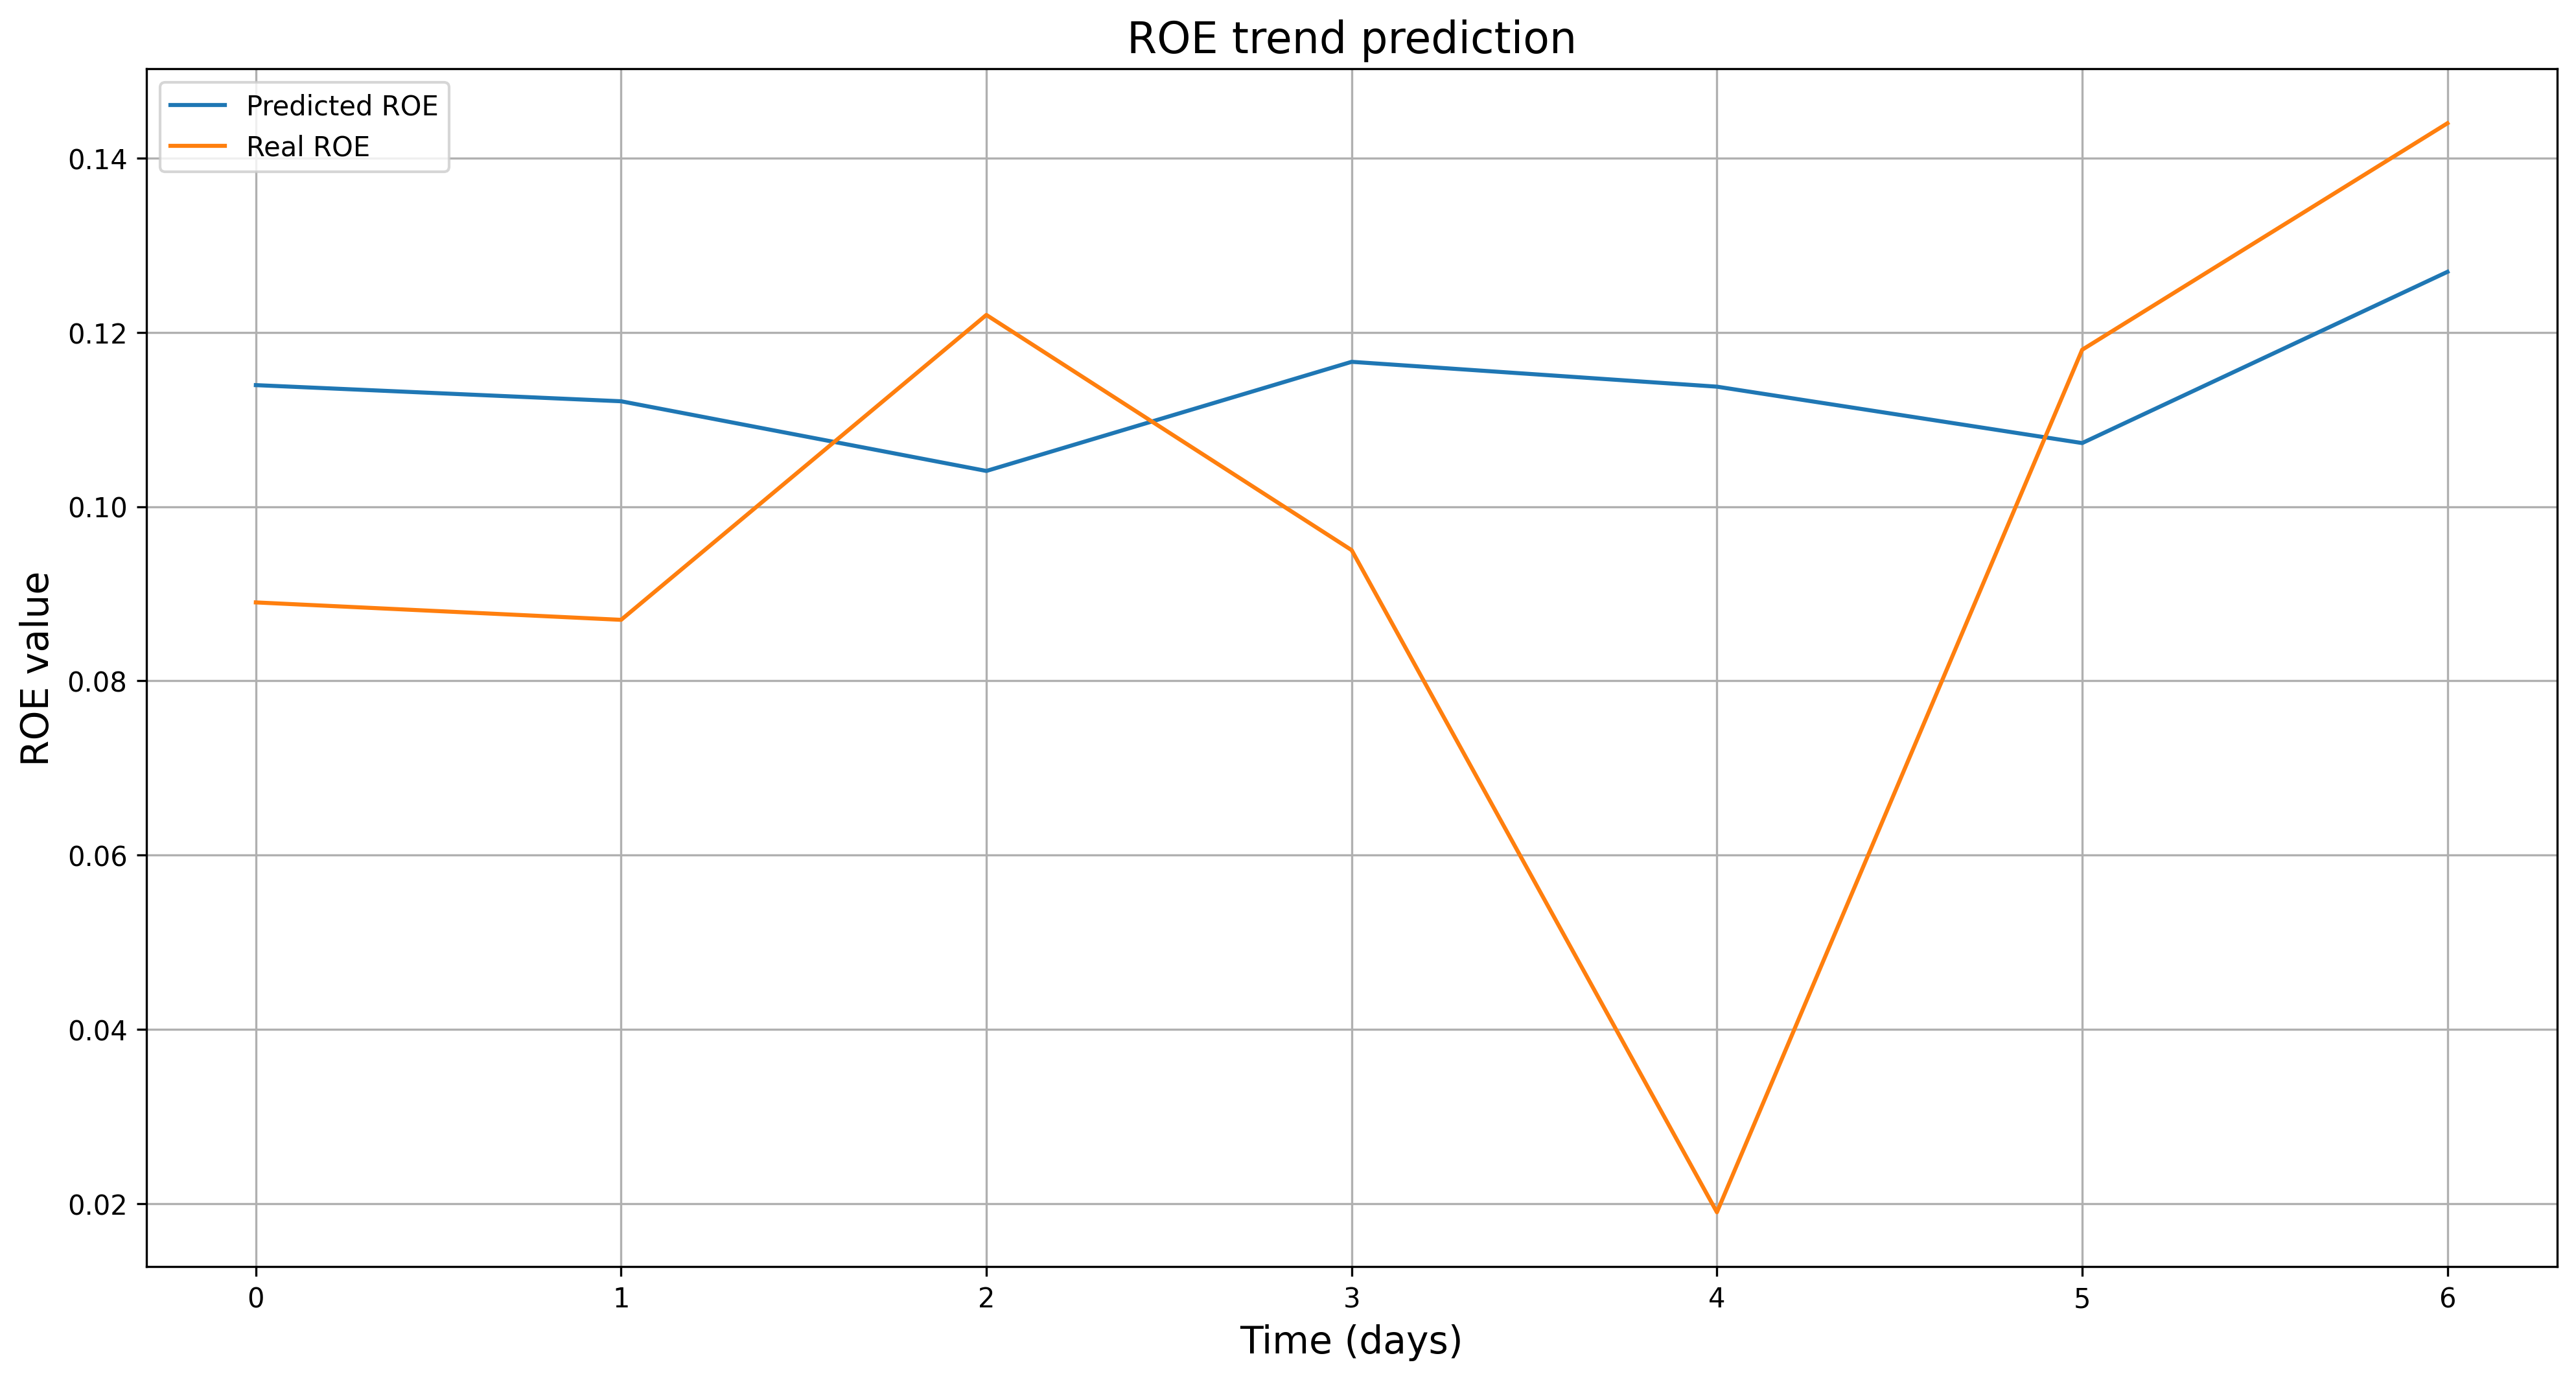

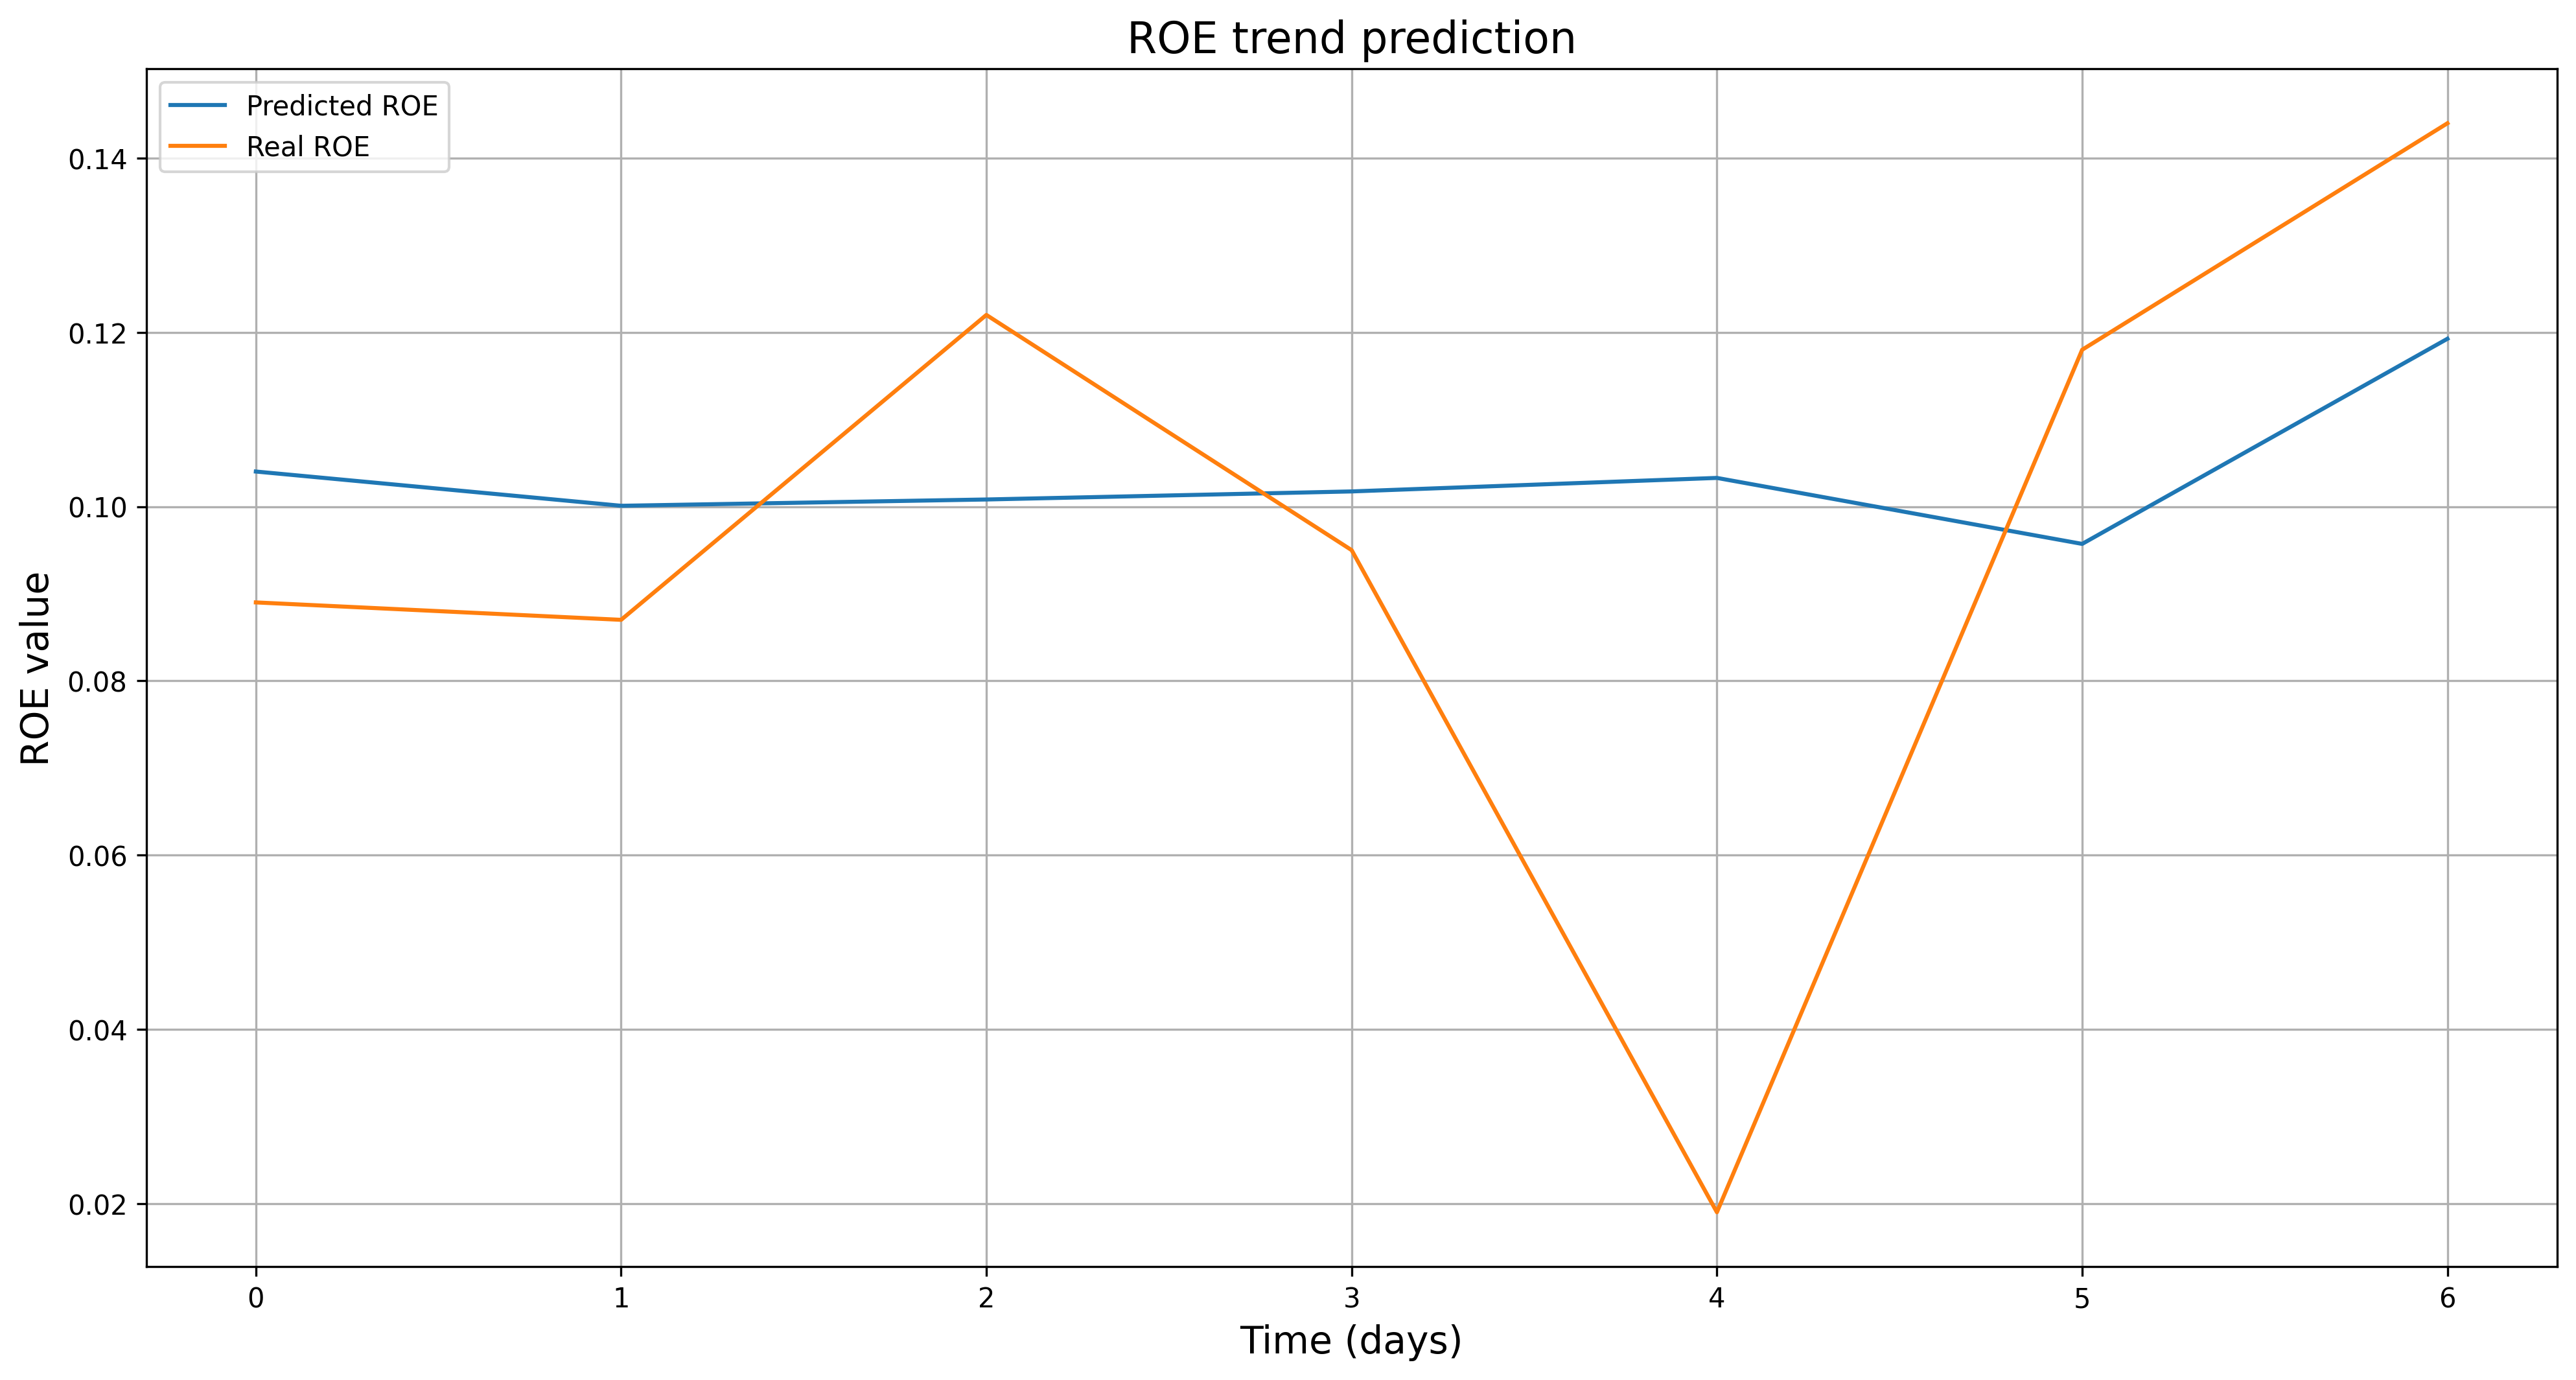

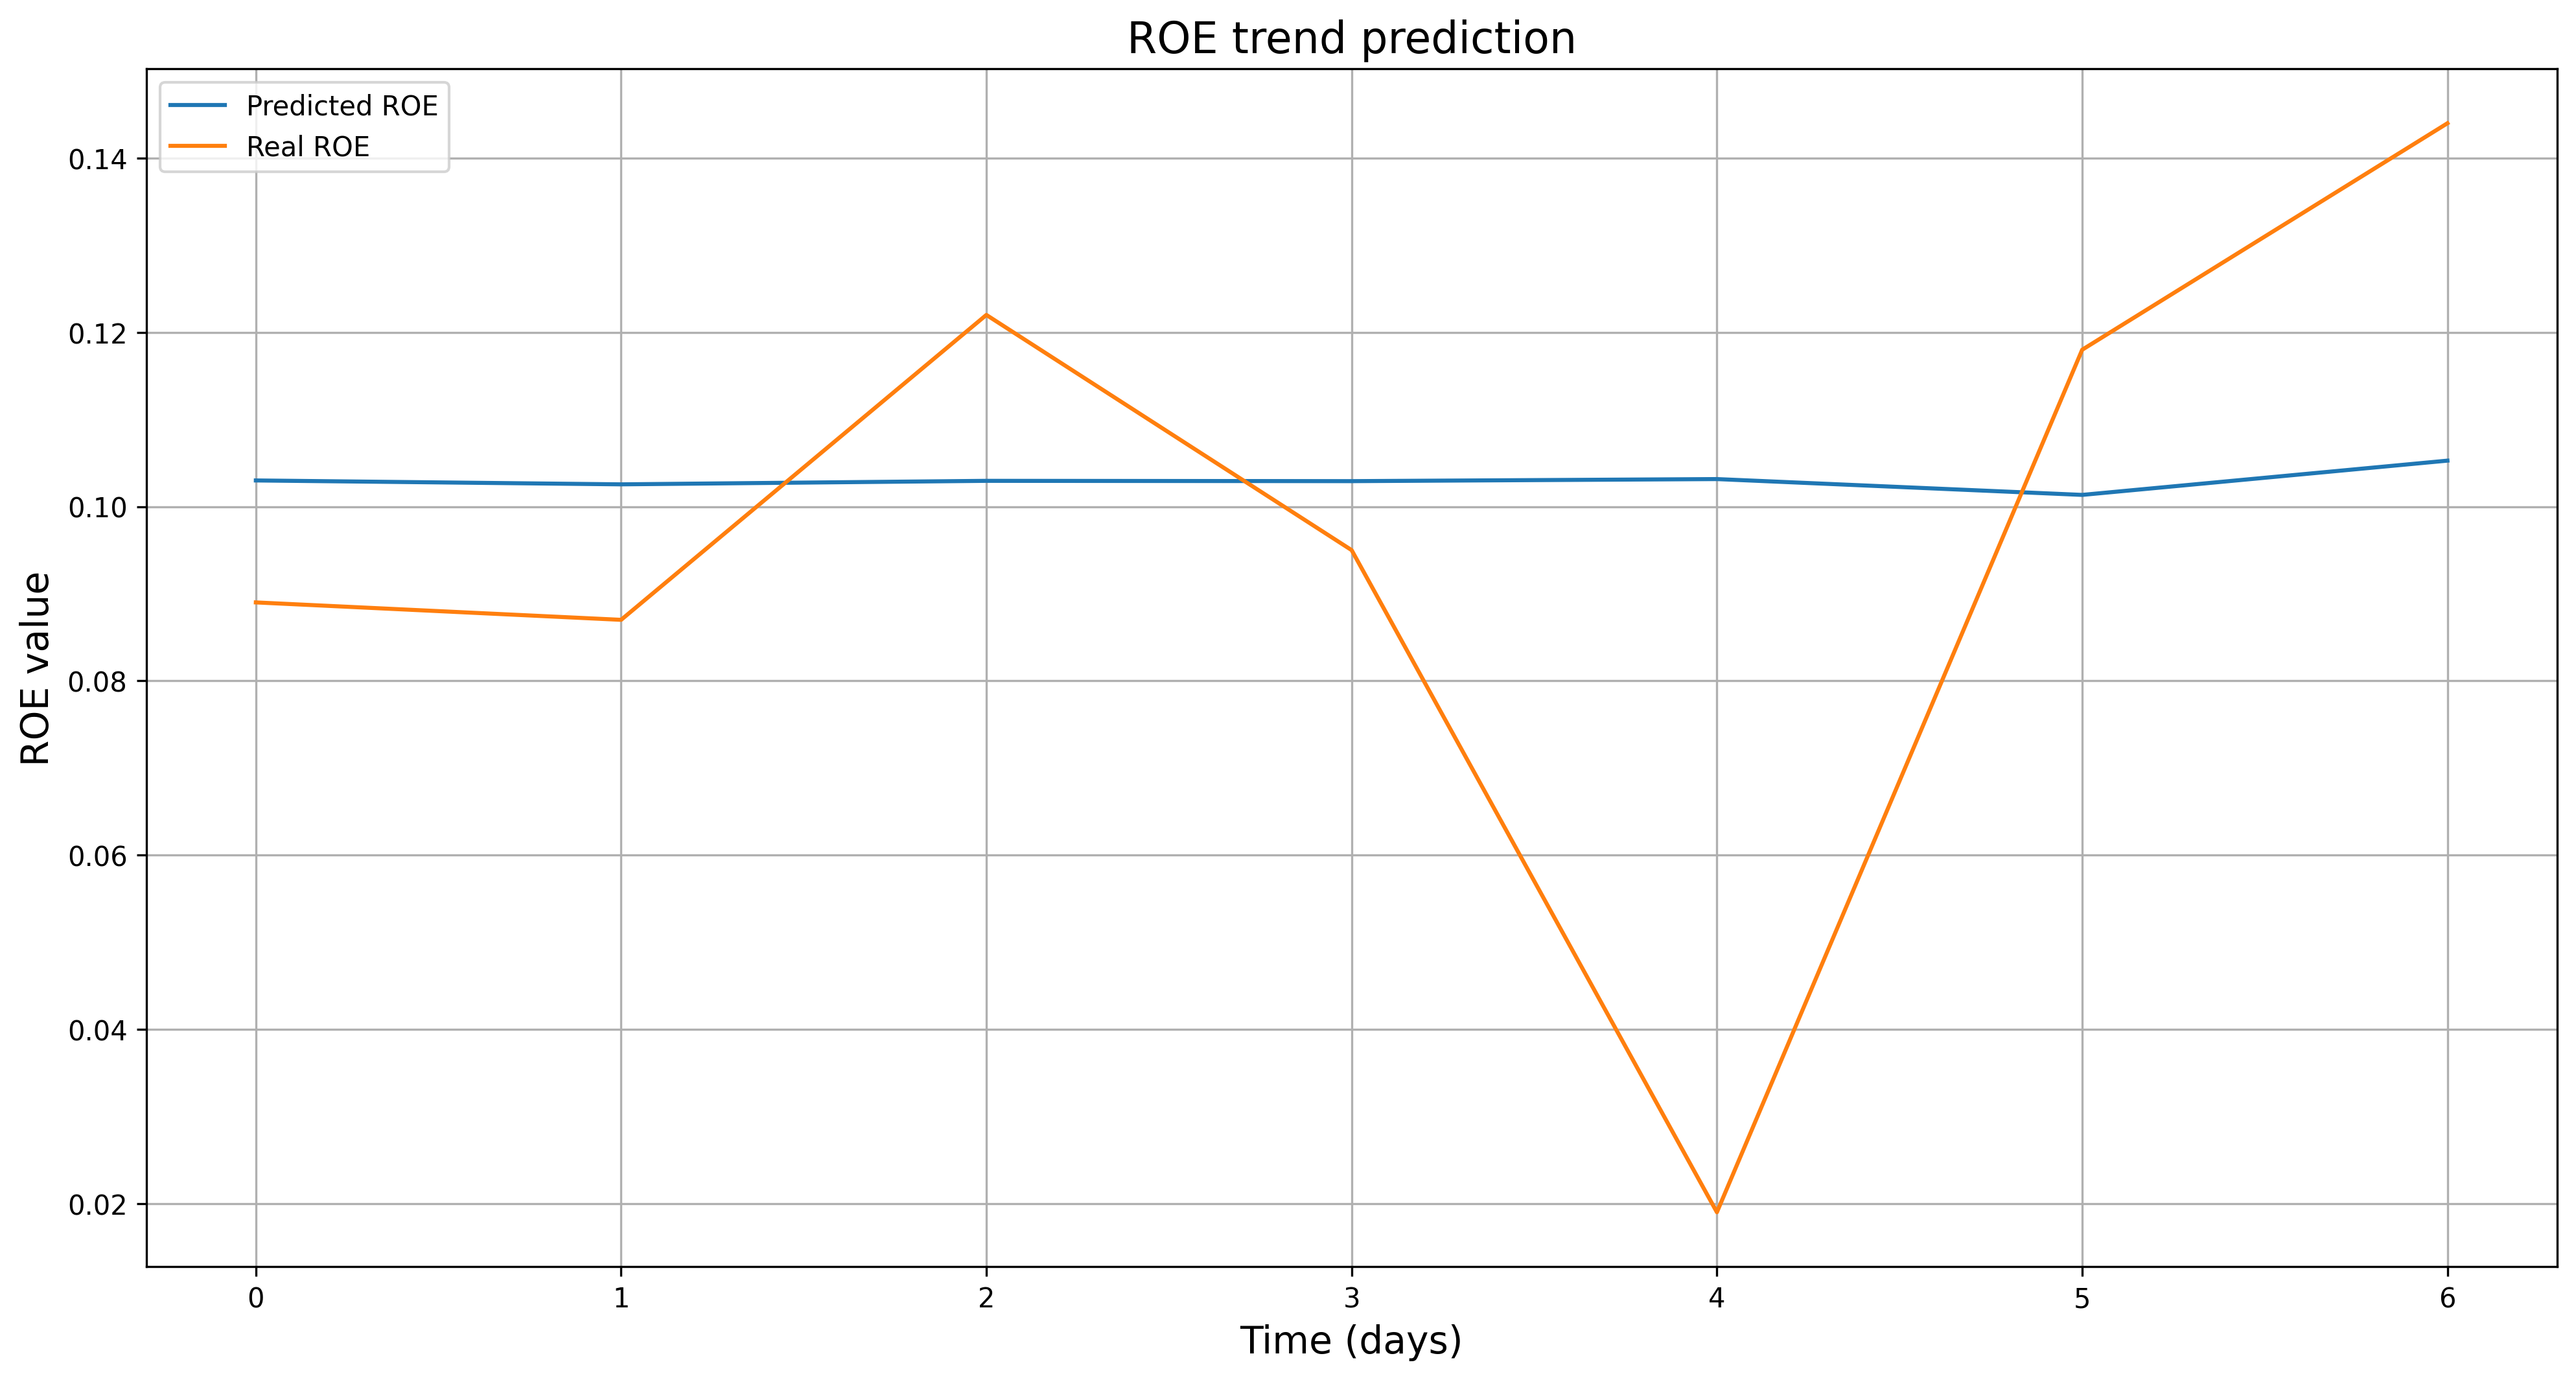

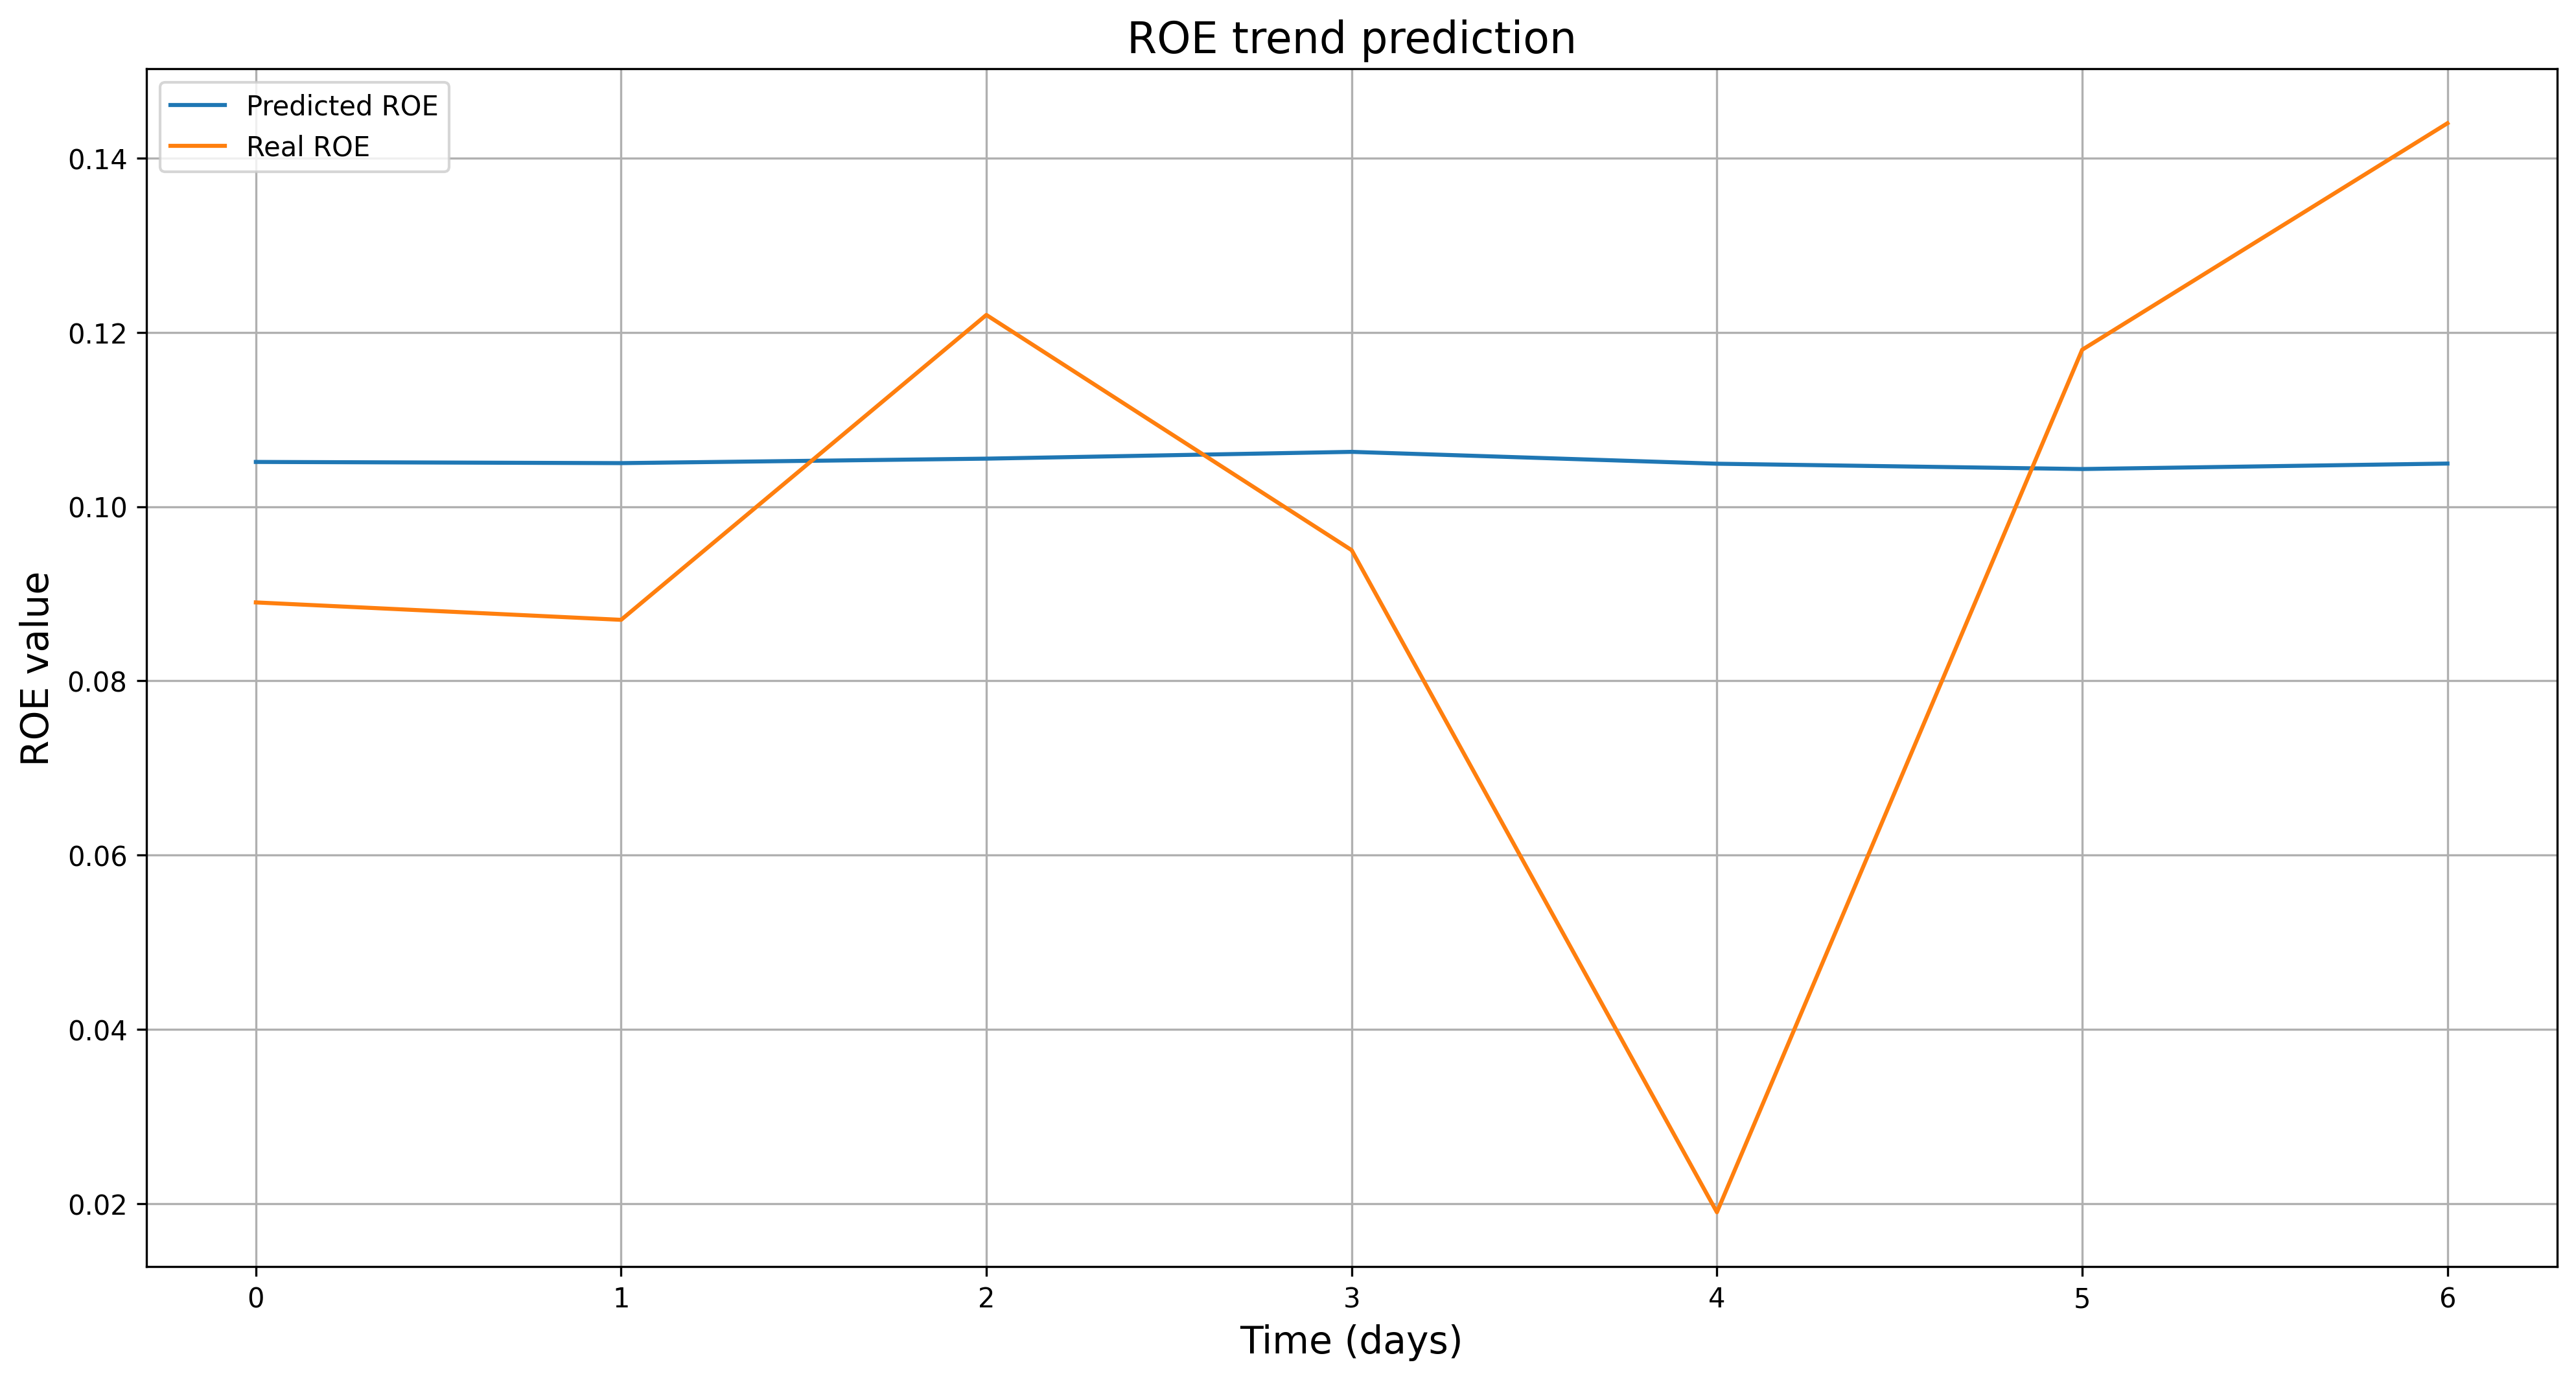

In [31]:
plot_prediction(y_pred_denorm_gru, y_test, "GRU")
plot_prediction(y_pred_denorm_bigru, y_test, "BiGRU")
plot_prediction(y_pred_denorm_bilstm, y_test, "BiLSTM")
plot_prediction(y_pred_denorm_lstm, y_test, "LSTM")

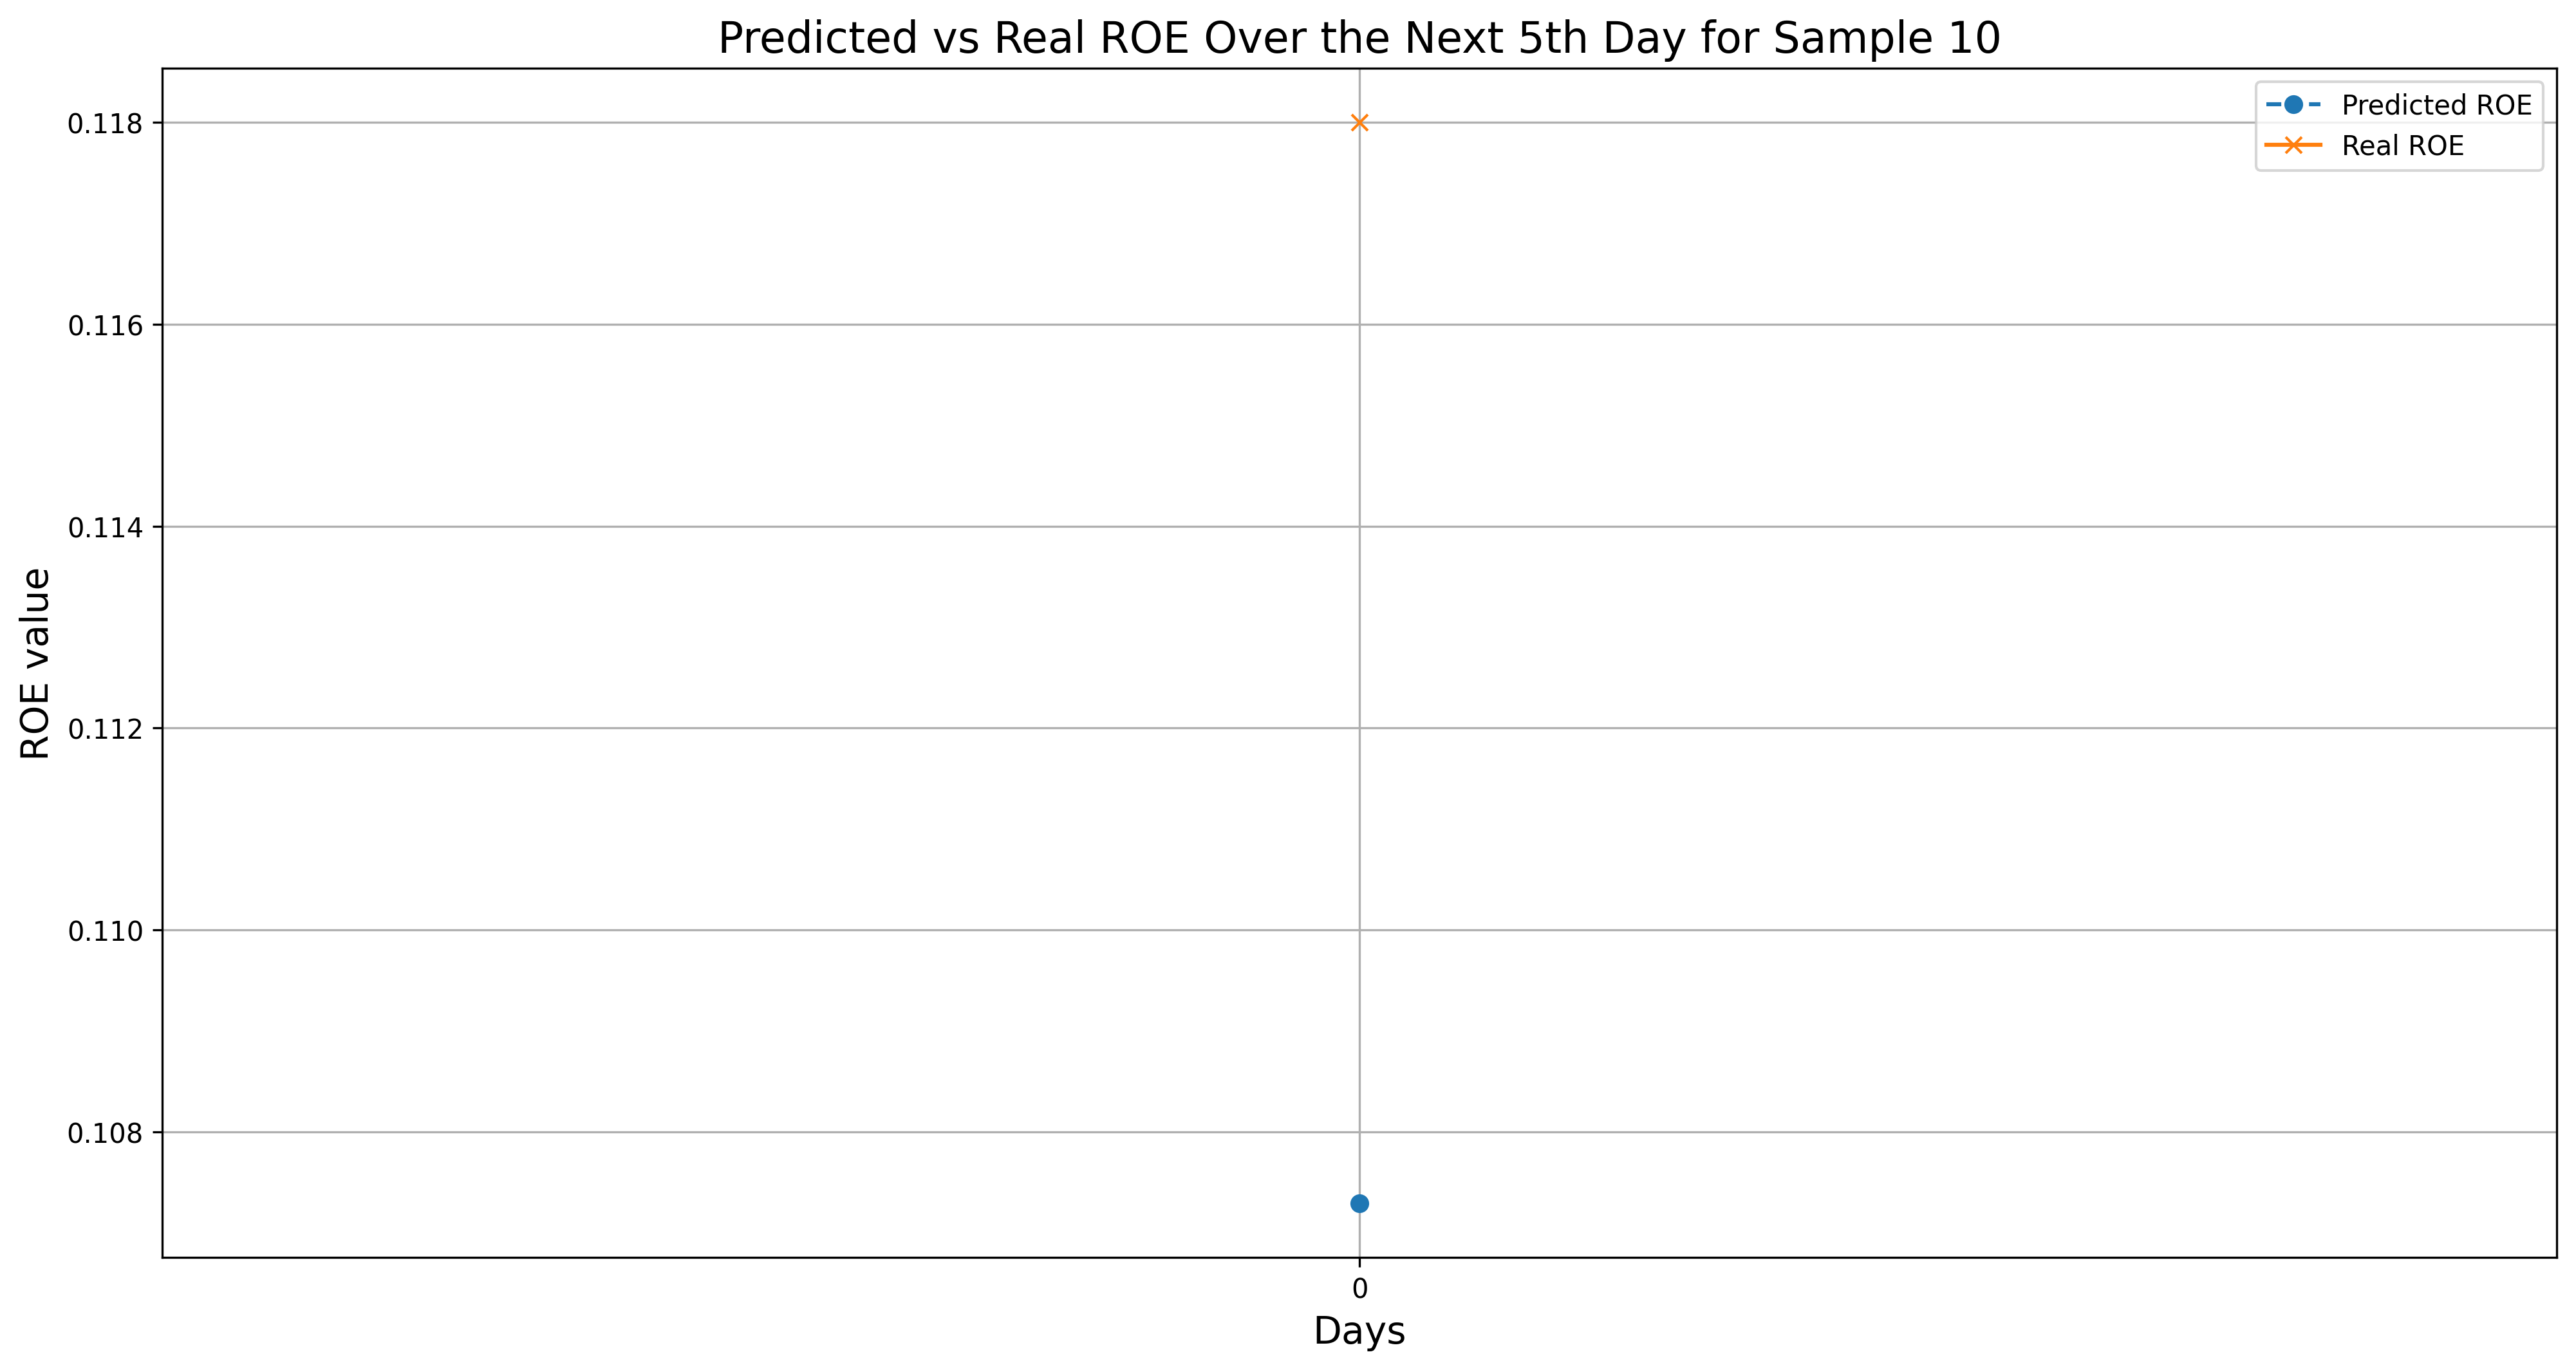

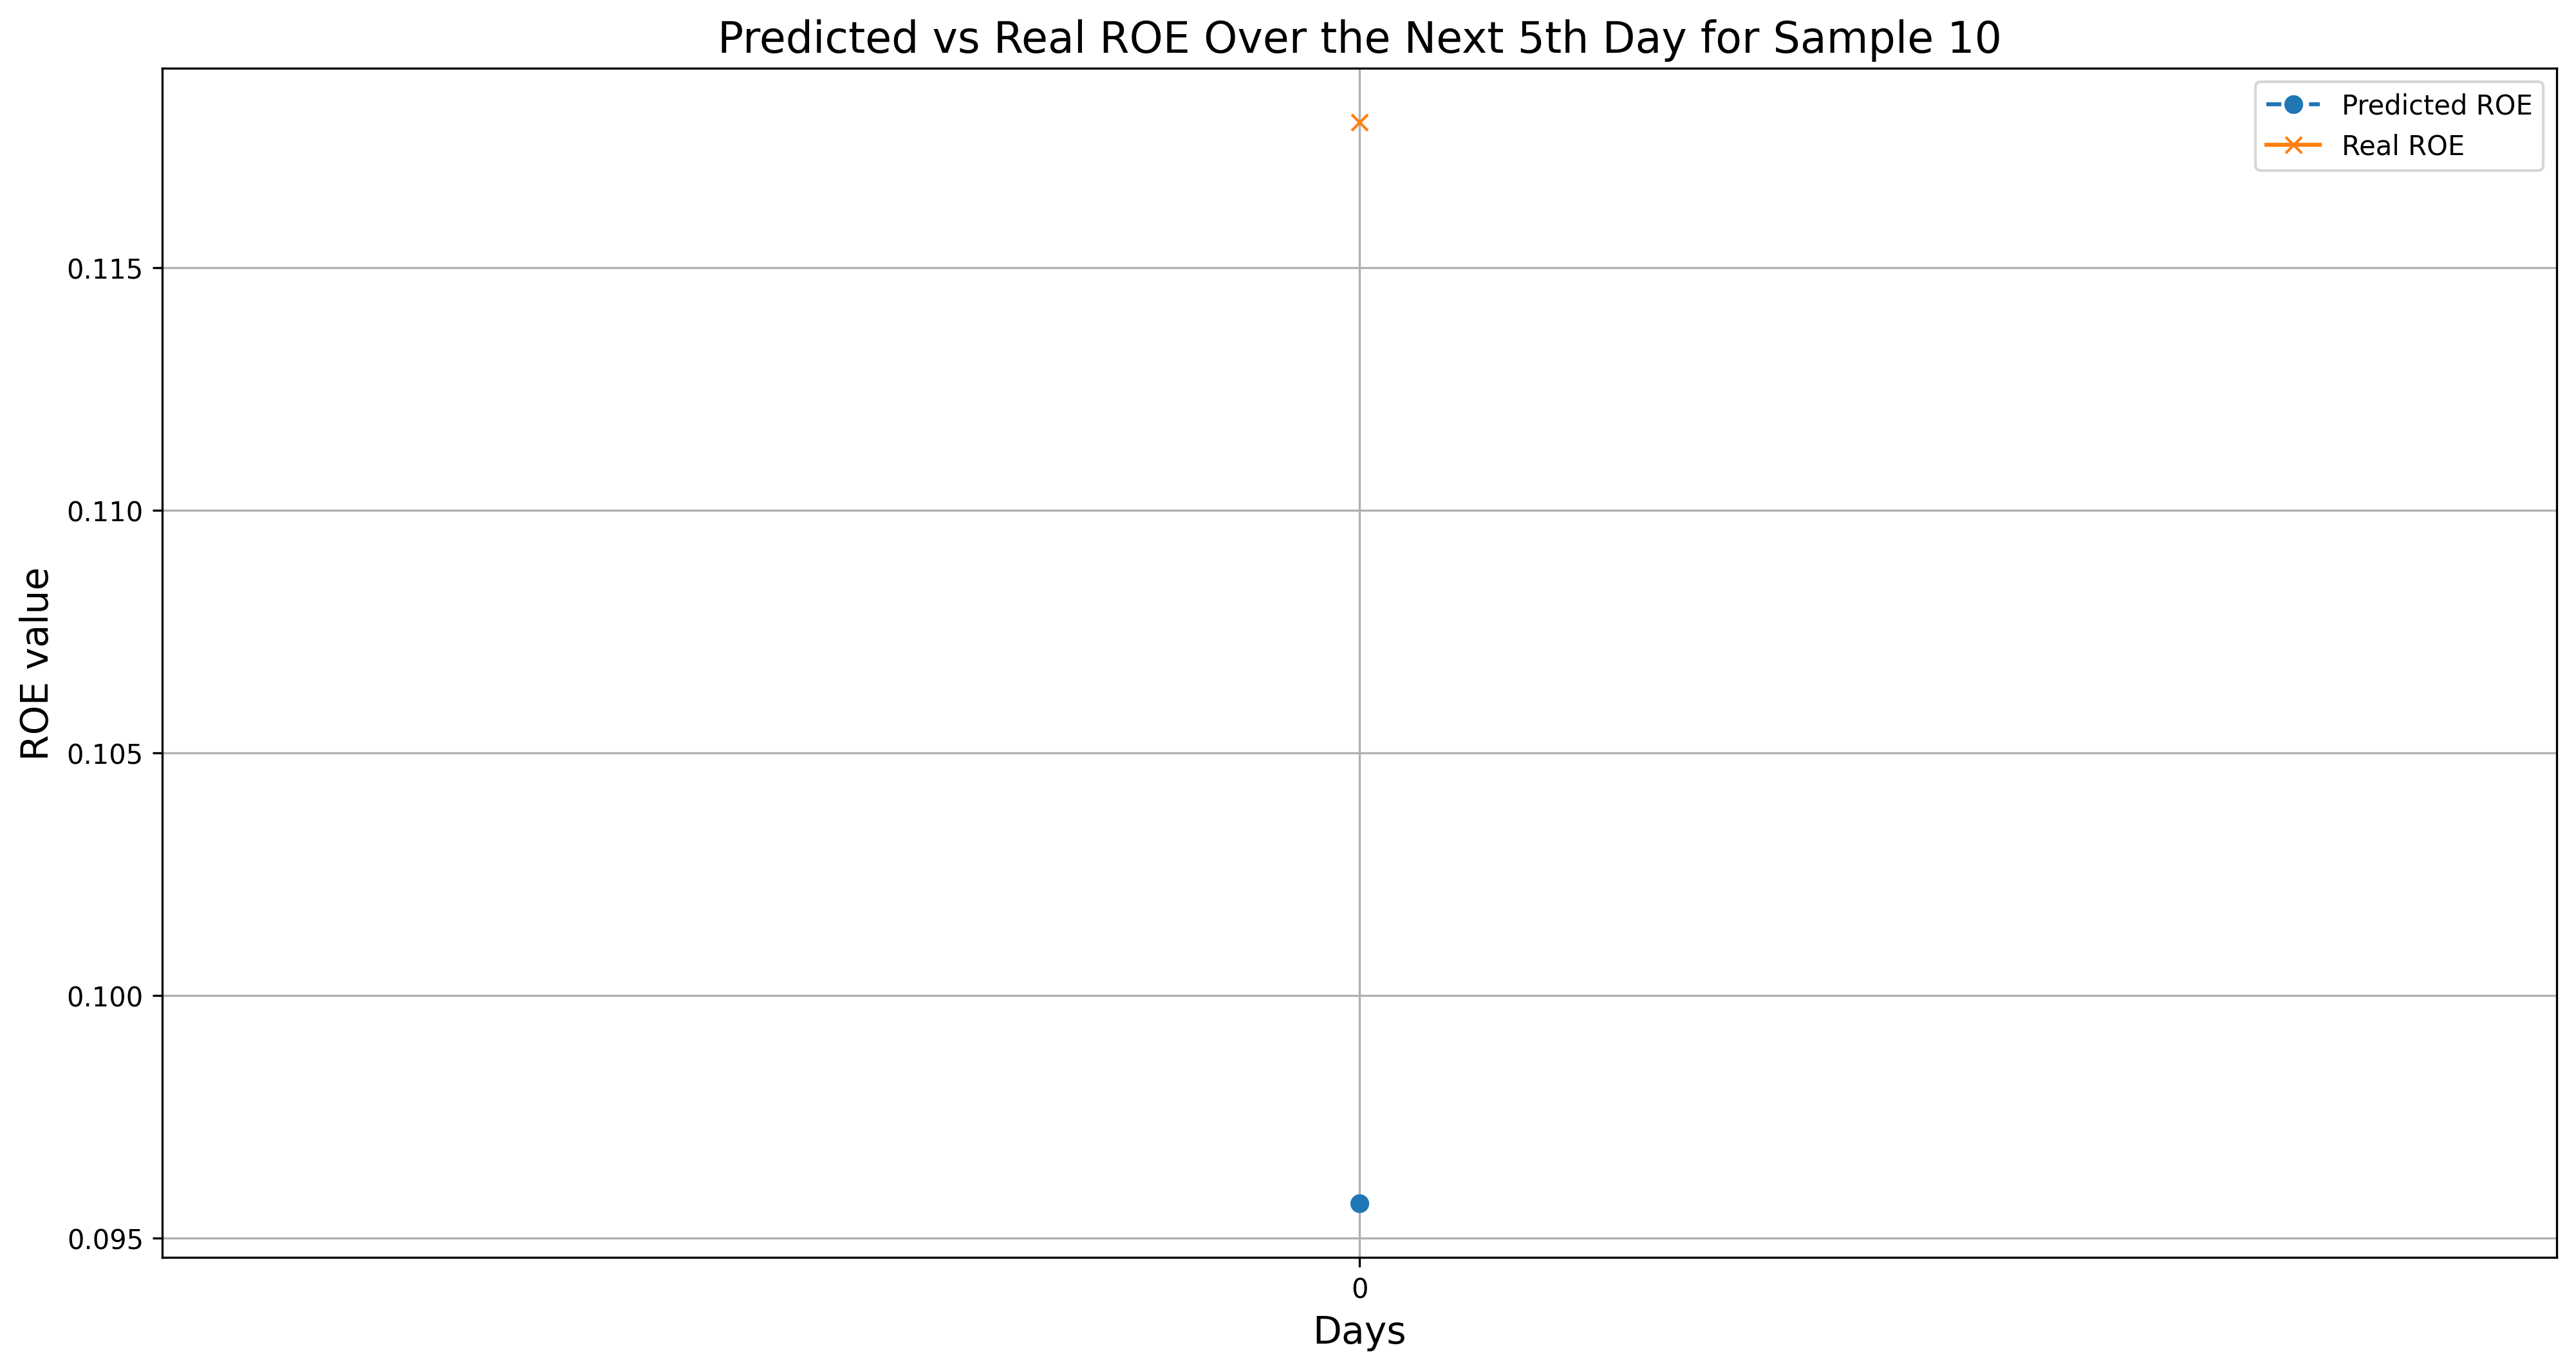

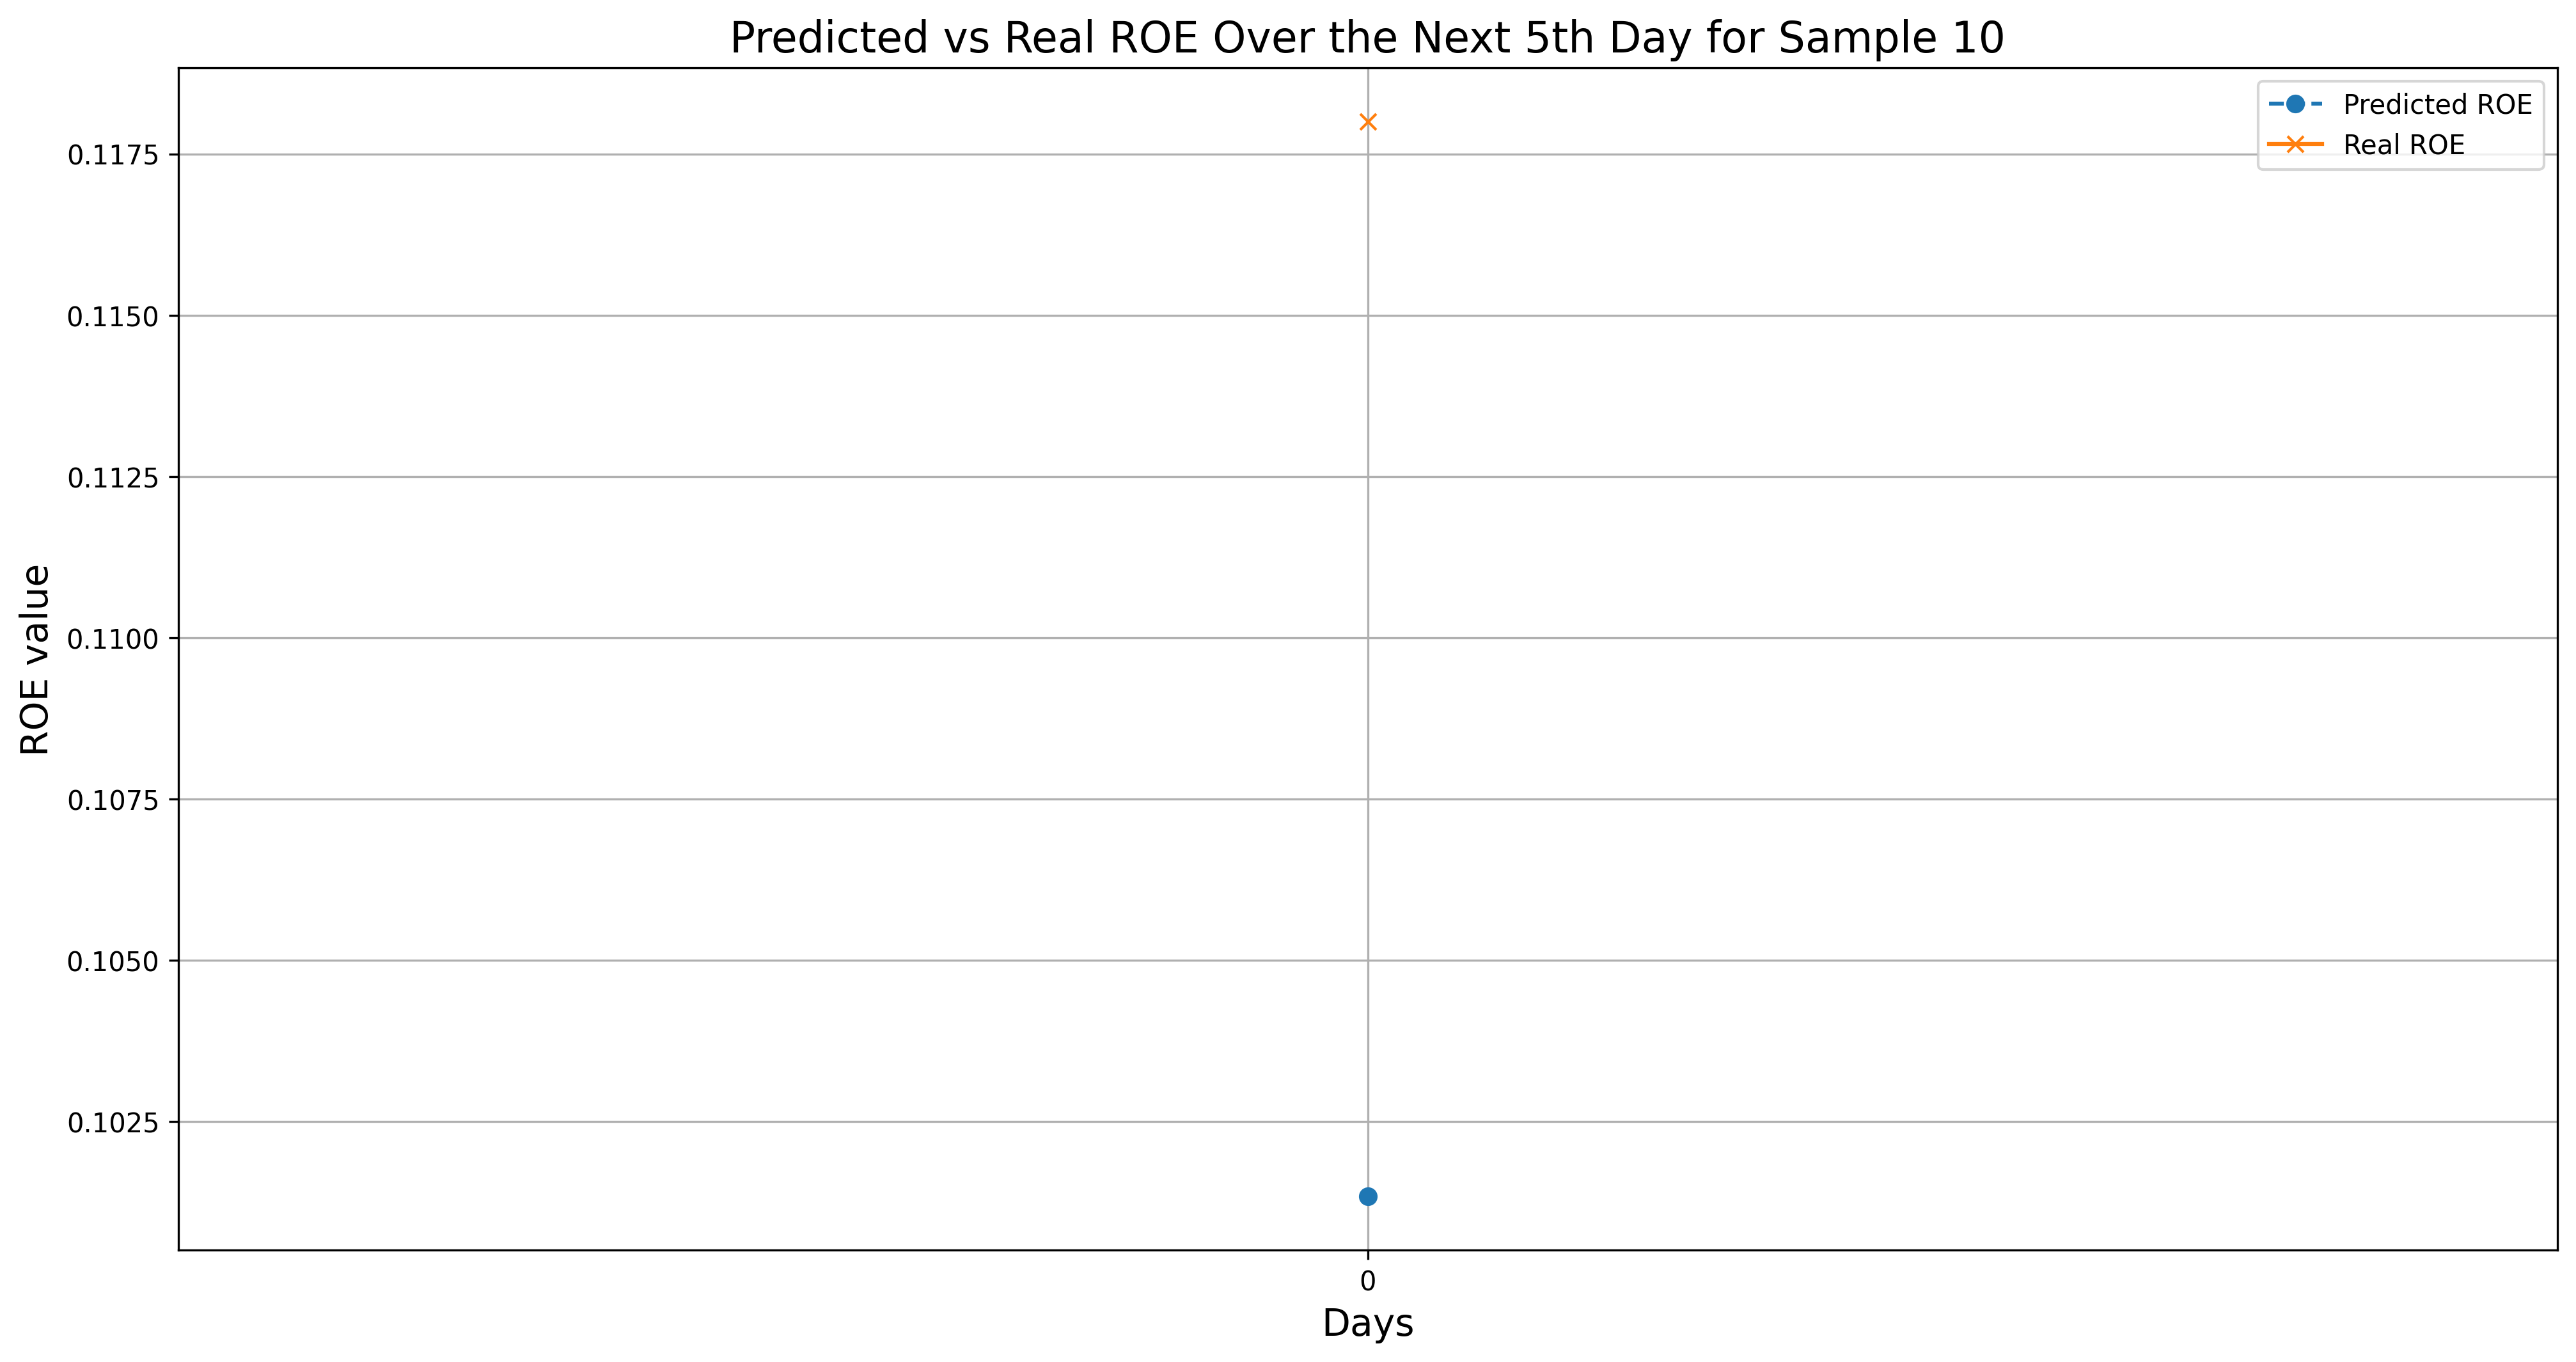

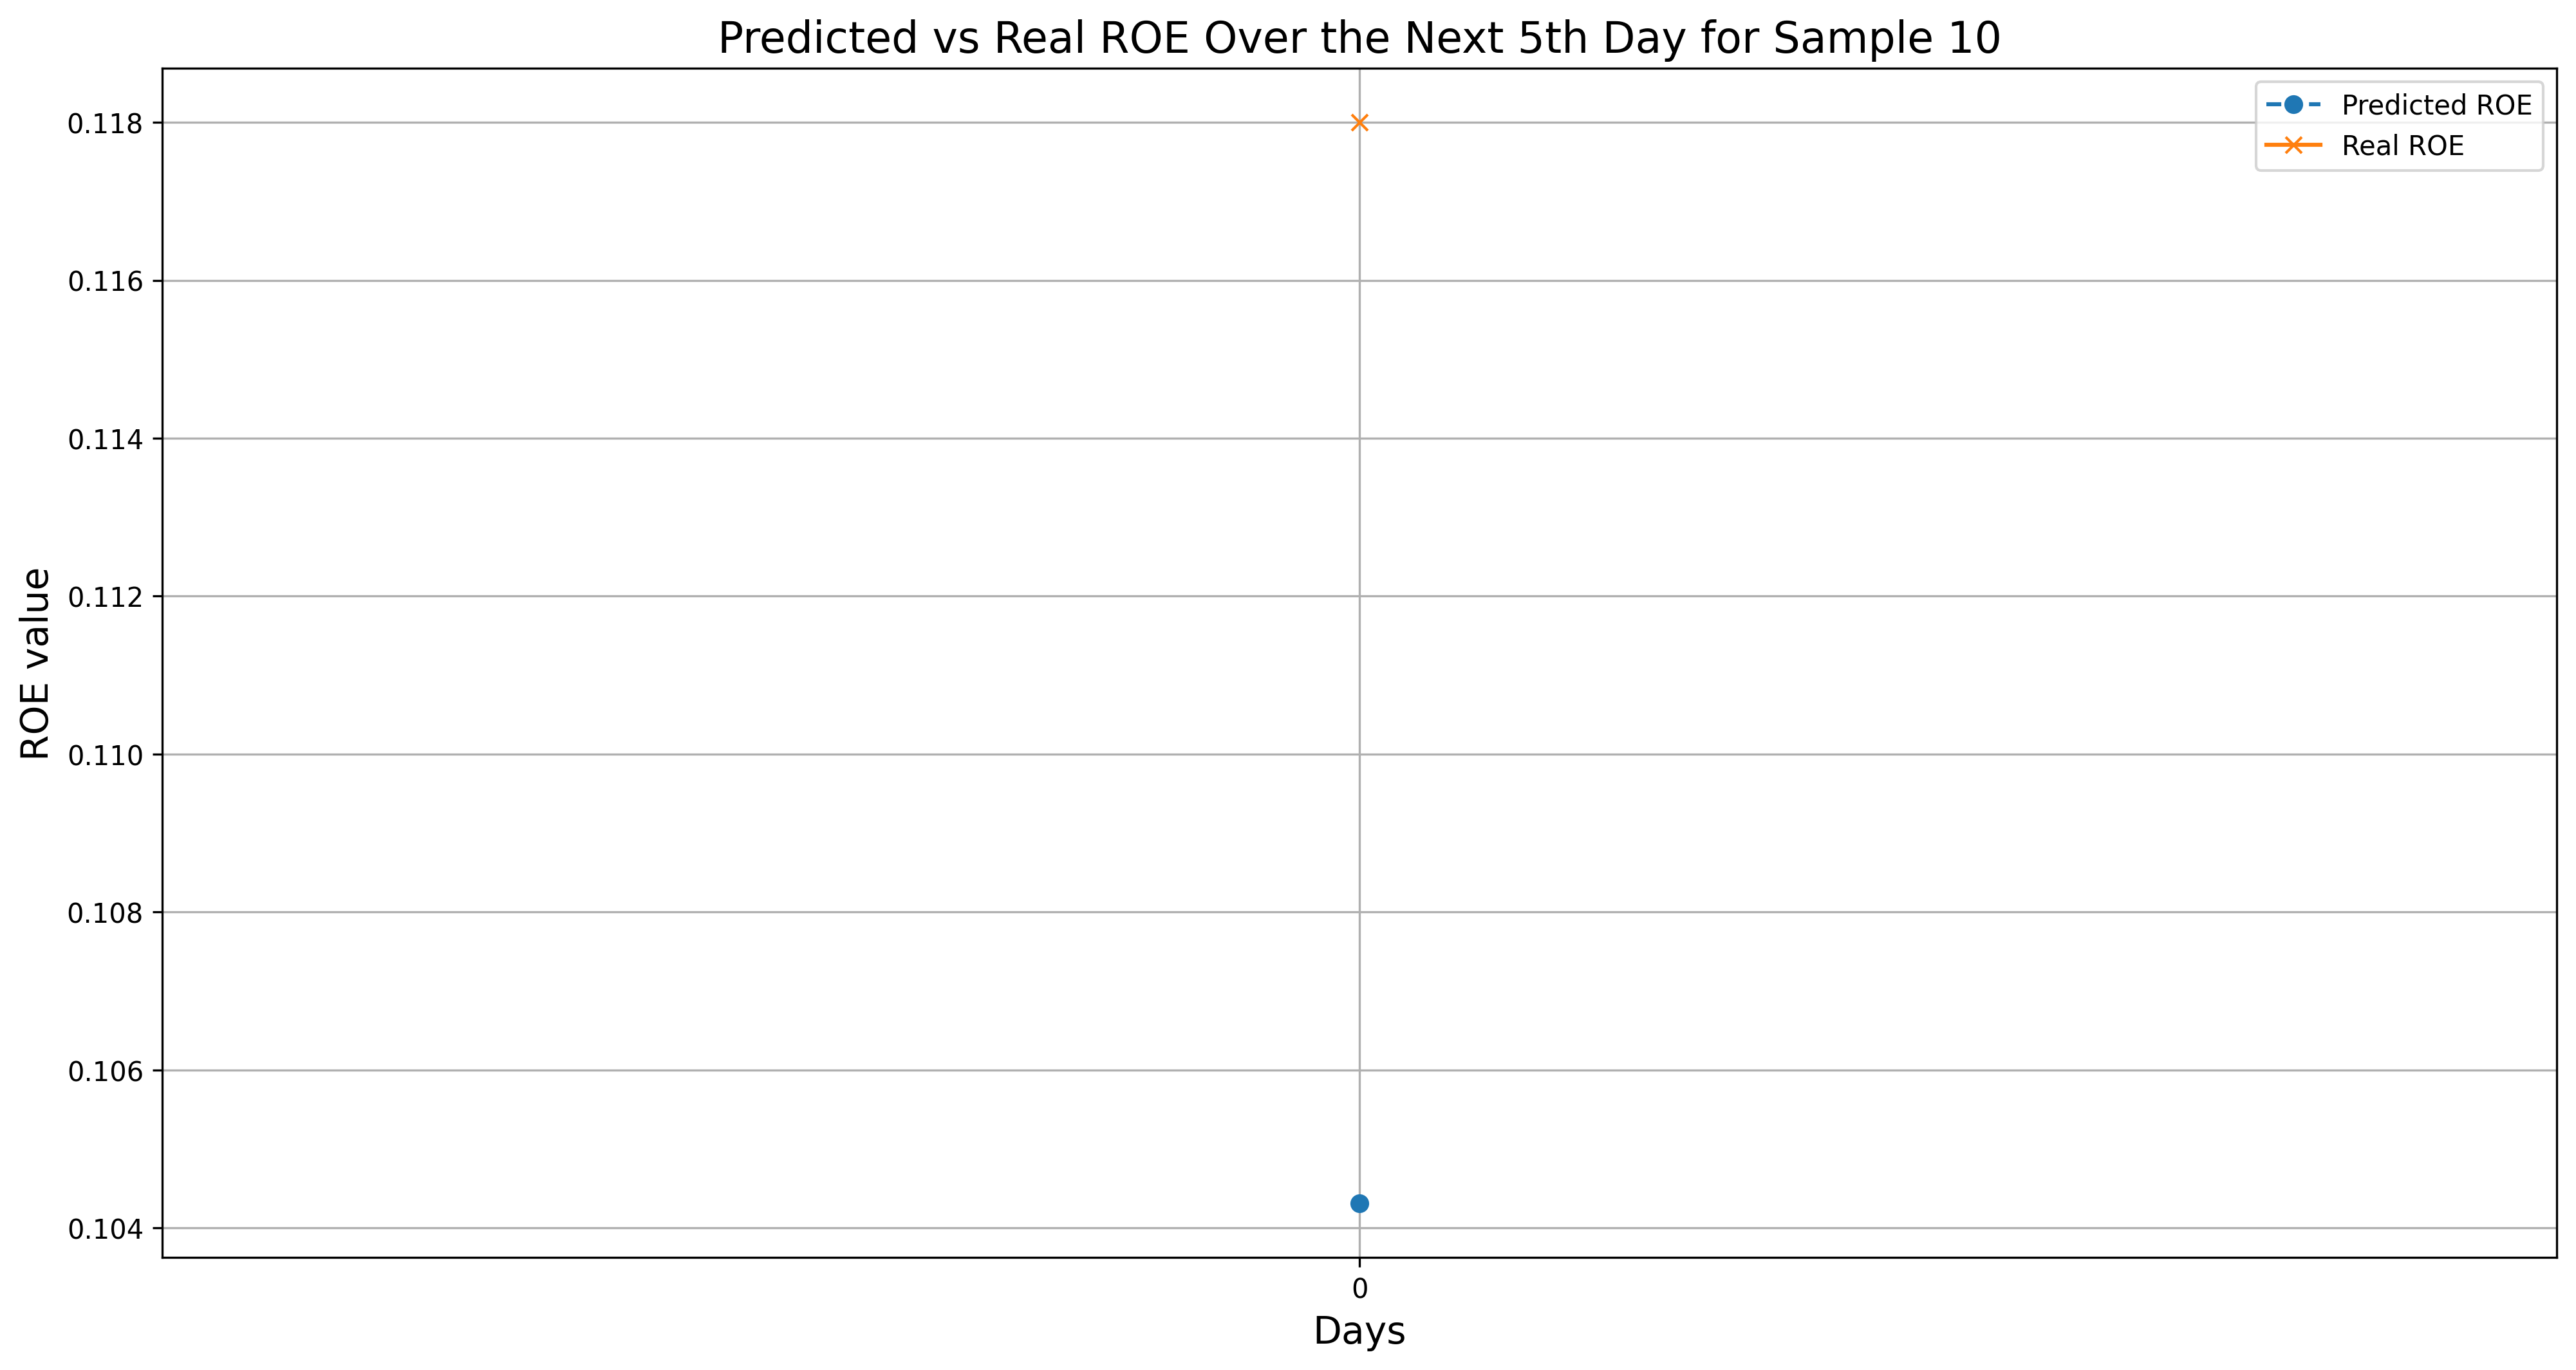

In [32]:
plot_prediction_timestep(y_pred_denorm_gru, y_test, "GRU")
plot_prediction_timestep(y_pred_denorm_bigru, y_test, "BiGRU")
plot_prediction_timestep(y_pred_denorm_bilstm, y_test, "BiLSTM")
plot_prediction_timestep(y_pred_denorm_lstm, y_test, "LSTM")

In [33]:
stop here

SyntaxError: invalid syntax (<ipython-input-33-a96ba3aab008>, line 1)

## Time series split train

In [17]:
# Step 1: Split to train and test set
from sklearn.model_selection import train_test_split
import numpy as np # Import numpy


# Split the entire dataset into train (80%) and test (20%)
X_train_full, X_test, y_train_full, y_test = train_test_split(X_data, y_data,
                                                              test_size=0.2,
                                                              random_state=42,
                                                              shuffle=False)

# Convert X_train_full and y_train_full to NumPy arrays
X_train_full = np.array(X_train_full) # Convert to NumPy array
y_train_full = np.array(y_train_full) # Convert to NumPy array
X_test = np.array(X_test) # Convert to NumPy array
y_test = np.array(y_test) # Convert to NumPy array

In [18]:
from sklearn.preprocessing import MinMaxScaler
import joblib

X_train_norm = X_train_full.copy()
#X_val_norm = X_val.copy()
X_test_norm = X_test.copy()
feature_scalers = []
y_scaler = MinMaxScaler()
# Loop through each feature (axis=2) and scale across time and samples
for i in range(X_train_full.shape[2]):
    # Flatten the data for the i-th feature and apply MinMaxScaler
    scaler = MinMaxScaler()
    X_train_norm[:, :, i] = scaler.fit_transform(X_train_full[:, :, i])
    #X_val_norm[:, :, i] = scaler.transform(X_val[:, :, i])
    X_test_norm[:, :, i] = scaler.transform(X_test[:, :, i])
    feature_scalers.append(scaler)

    y_train_norm = y_scaler.fit_transform(y_train_full)
    #y_val_norm = y_scaler.transform(y_val)
    y_test_norm = y_scaler.transform(y_test)


# Saving the feature scaler (scaler for input features)
joblib.dump(feature_scalers, 'task4_feature_scalers.pkl')

# Saving the label scaler (scaler for output labels)
joblib.dump(y_scaler, 'task4_y_scaler.pkl')

# Check the new shapes (they should remain the same as before)
print("Shape of scaled training set: ", X_train_norm.shape)
#print("Shape of scaled validation set: ", X_val_norm.shape)
print("Shape of scaled test set: ", X_test_norm.shape)
print()
print("Shape of scales training label ", y_train_norm.shape)
#print("Shape of scales validation label ", y_val_norm.shape)
print("Shape of scales test label ", y_test_norm.shape)

Shape of scaled training set:  (56, 1, 17)
Shape of scaled test set:  (14, 1, 17)

Shape of scales training label  (56, 1)
Shape of scales test label  (14, 1)


In [20]:
# Step 2: Time series split for training set
from sklearn.model_selection import TimeSeriesSplit
from tensorflow import keras
# Create a TimeSeriesSplit object with 5 splits
tscv = TimeSeriesSplit(n_splits=5)
loss_score = []

mc = keras.callbacks.ModelCheckpoint(filepath="/content/4_roe_nextday_model_bigru_ts.keras", # Path to save the model
                                     monitor='val_loss', # Metric to evaluate the model performance when looking for a better model.
                                     mode='min', # mode='auto'/'max'/'min': the monitor should be max/min to be better.
                                                 # In auto mode, the mode is set to max if the quantities monitored are 'acc' or start with 'fmeasure' (f-score) and are set to min for the rest of the quantities.
                                     verbose=0, # Inform every time a better model is found and saved.
                                     save_best_only=True) # Only save the model if the current training epoch is the best. 'False' means save models of all training epochs

# Loop through each split generated by TimeSeriesSplit
for train_index, val_index in tscv.split(X_train_norm):
    # Use different variable names for clarity
    X_train_split, X_val = X_train_norm[train_index], X_train_norm[val_index]
    y_train_split, y_val = y_train_norm[train_index], y_train_norm[val_index]

    X_train = np.array(X_train_split)
    X_val = np.array(X_val)
    y_train = np.array(y_train_split)
    y_val = np.array(y_val)
    # Reshape the numpy array to fit the neural network input shape requirement
    X_train = X_train.reshape(X_train.shape[0], window_size, num_features)
    X_val = X_val.reshape(X_val.shape[0], window_size, num_features)
    #X_test = X_test.reshape(X_test.shape[0], window_size, num_features)
    # create and compile model
    model_bigru = create_bigru((window_size, num_features))
    model_bigru.compile(loss='mean_squared_error', optimizer='SGD', metrics=['mae'])
    # Train the model. Using Colab for training
    history_bigru_ts = model_bigru.fit(X_train, y_train, # Data feature and data label
                    batch_size=32, # Batch size
                    epochs=10, # Number of training epochs
                    validation_data=(X_val, y_val), # Validation set
                    callbacks=[mc]) # Use callback ModelCheckpoint during the training
    loss= model_bigru.evaluate(X_val, y_val)
    loss_score.append(loss)
    print(f"Validation loss for fold: {loss}")

print(f"Mean validation loss: {np.mean(loss_score)}")
print(f"Standard deviation of validation loss: {np.std(loss_score)}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 0.6896 - mae: 0.8178 - val_loss: 0.2768 - val_mae: 0.4330
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.5895 - mae: 0.7544 - val_loss: 0.2430 - val_mae: 0.4020
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.5108 - mae: 0.7007 - val_loss: 0.2188 - val_mae: 0.3777
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.4565 - mae: 0.6608 - val_loss: 0.1999 - val_mae: 0.3604
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.4159 - mae: 0.6294 - val_loss: 0.1837 - val_mae: 0.3460
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.3827 - mae: 0.6027 - val_loss: 0.1694 - val_mae: 0.3327
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.3530 - mae: 0.5777 - val_loss: 0.1573 - val_mae: 0.3207
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.3266 - mae: 0.5545 - val_loss: 0.1467 - val_mae: 0.3095
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 0.3039 - mae: 0.5336 

In [21]:
print("=========BiGRU===========")
model_bigru_ts = get_model_n_evaluate("/content/4_roe_nextday_model_bigru_ts.keras", X_test_norm, y_test_norm)
y_pred_denorm_bigru_ts = get_reverse_prediction(model_bigru_ts, X_test_norm, y_scaler)

=========BiGRU===========
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0937 - mae: 0.2950
['loss', 'compile_metrics']
Loss and mae on the test set: loss = 0.09369277954101562, mae = 0.29502514004707336
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
MSE on the test set:  0.09369277444653293
Shape of denormalized training set:  (14, 1)


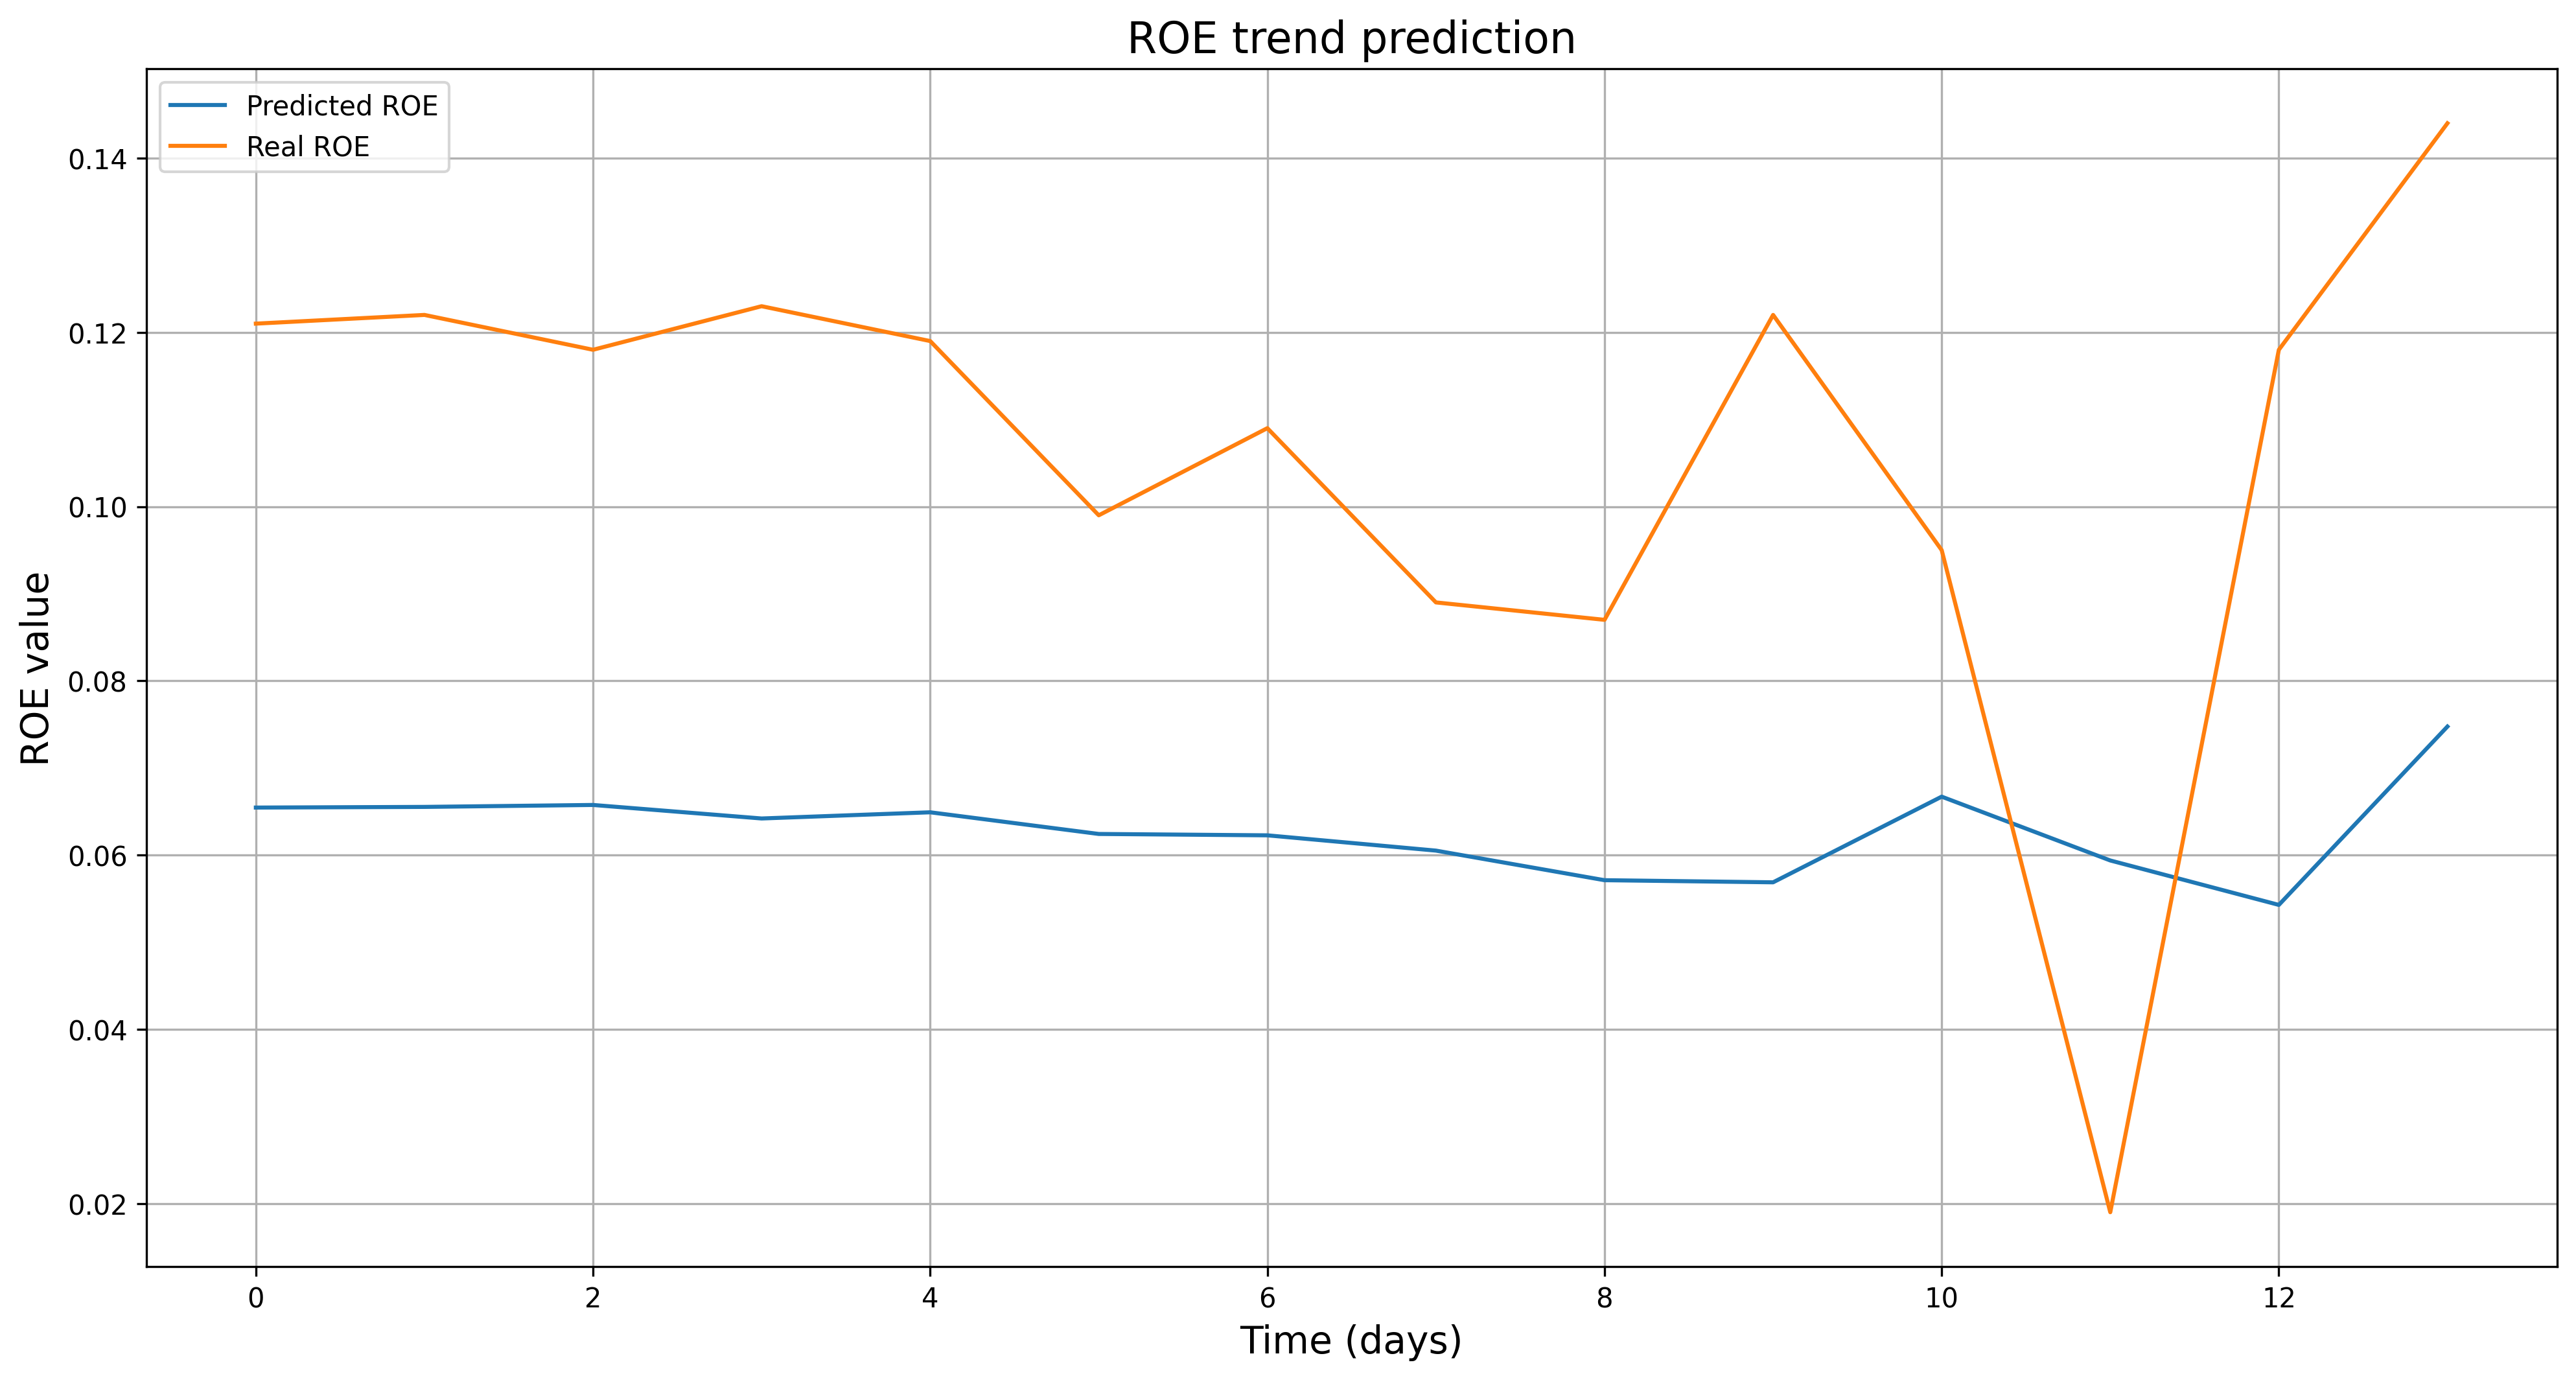

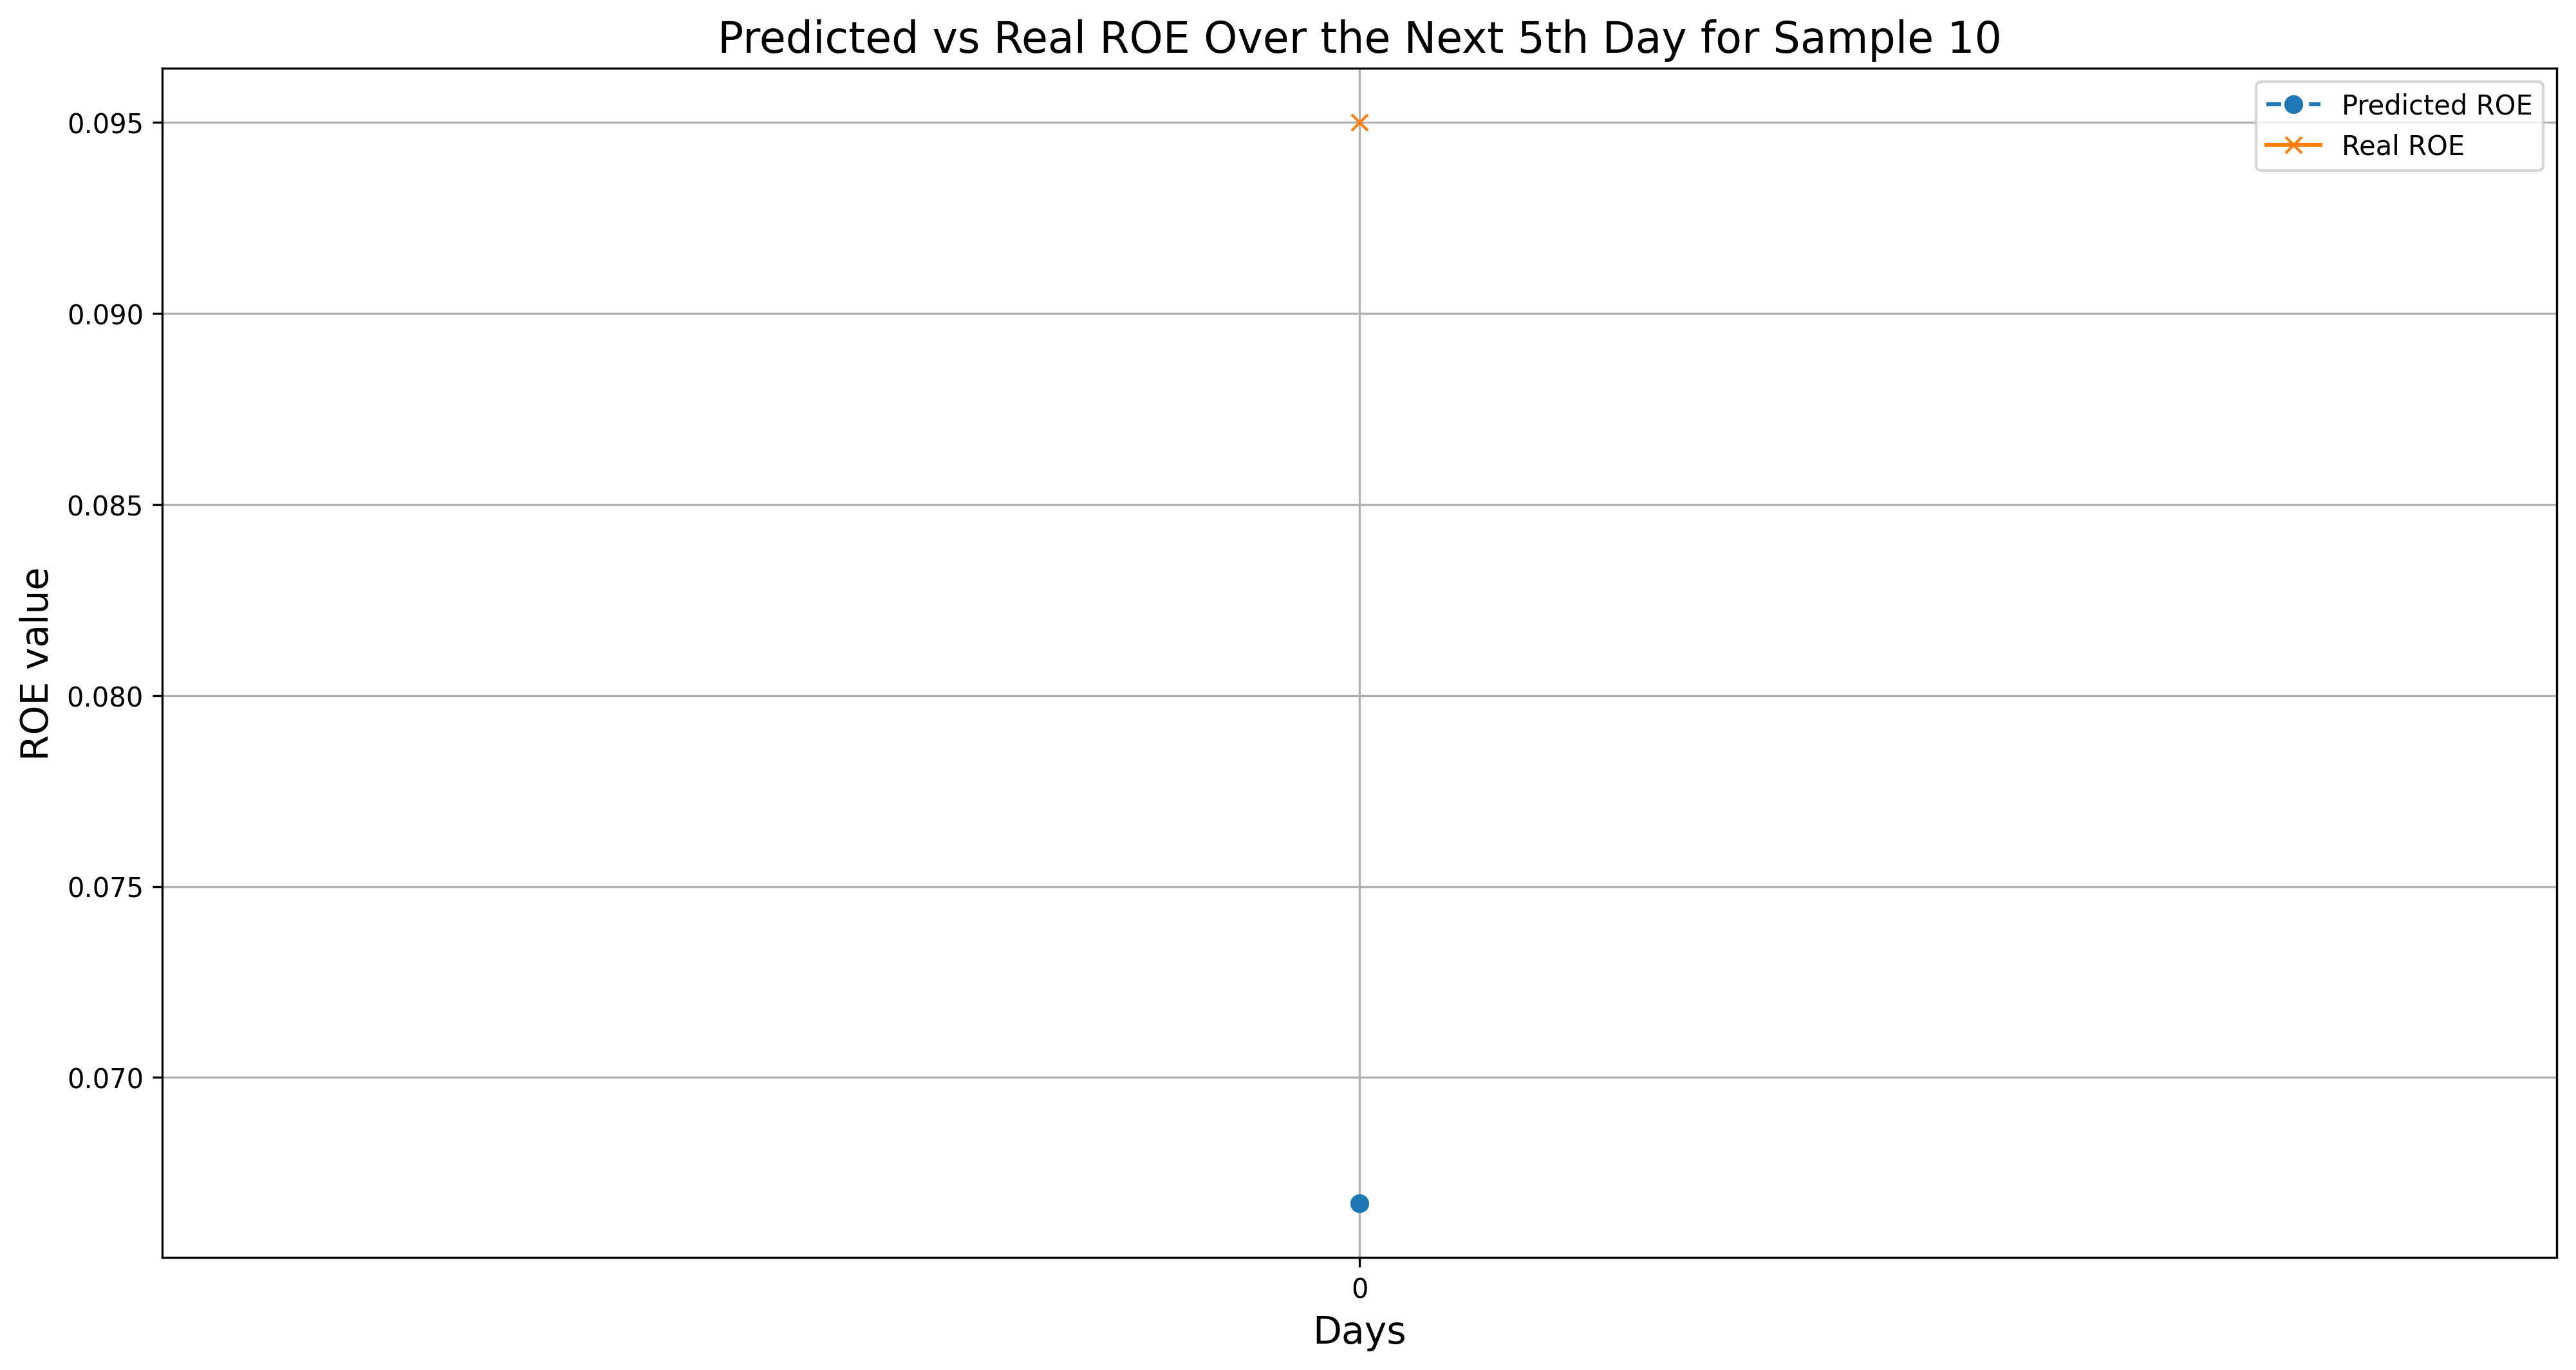

In [22]:
plot_prediction(y_pred_denorm_bigru_ts, y_test, "BiGRU")
plot_prediction_timestep(y_pred_denorm_bigru_ts, y_test, "BiGRU")

# Select porforlio

In [1]:
import pandas as pd
import numpy as np

def get_dataframe(file_path):
    try:
        # Read the CSV file
        data = pd.read_csv(file_path)
        # Drop unnecessary column if exists
        if 'Unnamed: 0' in data.columns:
            data.drop(columns=['Unnamed: 0'], inplace=True)
        # Sort by 'year' in ascending order
        if 'year' in data.columns:
            data = data.sort_values(by='year', ascending=True)
        # Define columns of interest (ensure proper case matching)
        columns_of_interest = [
            'year', 'earningPerShare', 'bookValuePerShare', 'equityOnTotalAsset',
            'grossProfitMargin', 'debtOnEquity', 'postTaxMargin', 'currentPayment',
            'quickPayment', 'cashOnEquity', 'cashCirculation', 'revenueOnAsset',
            'debtOnAsset', 'postTaxOnPreTax', 'capitalBalance', 'epsChange', 'roe',
            'roa'
        ]
        # Check if all required columns are present in the data
        missing_columns = [col for col in columns_of_interest if col not in data.columns]
        if missing_columns:
            print(f"Missing columns: {missing_columns}")
            return None
        # Select the required columns
        selected_data = data[columns_of_interest]
        # Reset index after selection
        selected_data = selected_data.reset_index(drop=True)
        # Drop columns with more than 3 missing values
        selected_data = selected_data.loc[:, selected_data.isnull().sum() <= 3]
        # Drop rows with any missing values
        selected_data.dropna(inplace=True)
        # Return the cleaned data
        return selected_data
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


In [10]:
def get_latest_data(df):
  new_data = df
  new_data.drop(columns='year', inplace = True)
  new_data.dropna(inplace=True)
  latest_data_feature = np.array(new_data.tail(1)).reshape(1,17)
  return latest_data_feature

def normalise(latest_data_feature, feature_scalers_path):
  feature_scalers = joblib.load(feature_scalers_path)
  latest_data_feature_norm = feature_scalers.transform(latest_data_feature)
  return latest_data_feature_norm

def get_prediction(loaded_model, X_test_norm, y_scaler):
  # Get prediction on the test data
  y_pred_norm = loaded_model.predict(X_test_norm)
  # denormalize the norm data back to the original scale:
  y_pred_denorm = y_scaler.inverse_transform(y_pred_norm)

  # Check the shapes
  print("Shape of denormalized training set: ", y_pred_denorm.shape)
  return y_pred_denorm

def predict_roe_nextquarter(model_path, latest_data_feature_norm, y_scaler_path):
  model = tf.keras.models.load_model(model_path)
  y_scaler = joblib.load(y_scaler_path)
  y_pred = get_prediction(model, latest_data_feature_norm, y_scaler)
  return y_pred

'''
profitable Company:
ROE > 10-15%
ROA > 3-5%
Less Profitable or Struggling Company:
ROE < 5-10%
ROA < 3%
'''

def get_y_pred(df, model_path, feature_scalers_path, y_scaler_path):
  latest_data_feature = get_latest_data(df)
  data_norm = normalise(latest_data_feature, feature_scalers_path)
  y_pred = predict_roe_nextquarter(model_path, data_norm, y_scaler_path)
  return y_pred

In [4]:
# test function
df = get_dataframe("..\\data\\raw\\data-vn-20230228\\data-vn-20230228\\financial-ratio\\AAA-VNINDEX-Finance.csv") 
latest_data = get_latest_data(df)
latest_data


array([[ 7.7500e+02,  1.2743e+04,  4.4600e-01,  7.5000e-02,  6.0000e-01,
         1.9000e-02,  1.5000e+00,  1.0000e+00,  1.8300e-01,  6.0000e+01,
         1.6000e+00,  3.0000e-01,  7.0000e-01,  1.8120e+03, -3.0000e-03,
         6.2000e-02,  2.9000e-02]])

In [5]:
def get_portfolio(ticker_predictions):
  # Sort dictionary by values in ascending order
  sorted_tickers = sorted(ticker_predictions.items(), key=lambda item: item[1])

  # Get bottom 5 entries
  bottom_5 = sorted_tickers[:5]

  # Get top 5 entries
  top_5 = sorted_tickers[-5:]

  return bottom_5, top_5

In [32]:
%pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
%pip install scikit-learn
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in g:\dl-stock-prediction\venv\lib\site-packages (1.5.2)




[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
pip show tensorflow

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: g:\dl-stock-prediction\venv\Lib\site-packages
Requires: tensorflow-intel
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [11]:
import os
import joblib
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Define the folder containing dataset files
folder_path = '..\\data\\raw\\data-vn-20230228\\data-vn-20230228\\financial-ratio'

# Initialize an empty dictionary to store ticker and predicted value
ticker_predictions = {}

# Iterate through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):  # Assuming files are in CSV format
        # Extract ticker from the filename (assuming format is 'TICKER_something.csv')
        ticker = filename.split('_')[0]

        # Load the dataset file
        file_path = os.path.join(folder_path, filename)
        data = get_dataframe(file_path)
        if data is None or data.empty:
          print(f"Skip empty dataFrame: {filename}!")
          continue

        # Perform prediction
        predicted_value = get_y_pred(
          df = data,
          model_path = "..\\src\\models\\vn\\task4_roe_nextquarter_model_bigru.keras",
          feature_scalers_path = "..\\src\\models\\vn\\task4_feature_scalers.pkl",
          y_scaler_path="..\\src\\models\\vn\\task4_y_scaler.pkl")

        # Store the predicted value in the dictionary
        ticker_predictions[ticker] = predicted_value
        print(f"Processed {ticker}!")

# Print the resulting dictionary
print(ticker_predictions)
portfolio = get_portfolio(ticker_predictions)
bottom_5 = portfolio[0]
top_5 = portfolio[1]
# Convert to DataFrame for displaying
bottom_5_df = pd.DataFrame(bottom_5, columns=['Ticker', 'Prediction'])
top_5_df = pd.DataFrame(top_5, columns=['Ticker', 'Prediction'])
top_5_df

Missing columns: ['year', 'earningPerShare', 'bookValuePerShare', 'equityOnTotalAsset', 'grossProfitMargin', 'debtOnEquity', 'postTaxMargin', 'currentPayment', 'quickPayment', 'cashOnEquity', 'cashCirculation', 'revenueOnAsset', 'debtOnAsset', 'postTaxOnPreTax', 'capitalBalance', 'epsChange', 'roe', 'roa']
Skip empty dataFrame: A32-UpcomIndex-Finance.csv!


AttributeError: 'list' object has no attribute 'transform'

# Allocation

In [ ]:

# Normalize ROE to calculate weights
top_5_df['Weight'] = top_5_df['Prediction'] / top_5_df['Prediction'].sum()

# Convert to Allocation Percentage
top_5_df['Allocation Percentage'] = top_5_df['Weight'] * 100

# Display the portfolio allocation in percentage
print(top_5_df[['Ticker', 'Prediction', 'Weight', 'Allocation Percentage']])
